In [1]:
from create_loops import *
import networkx as nx
%matplotlib widget 
import matplotlib
import multiprocessing  as mp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from Plateau_Problem.Triangulation_Meshing.tests.definir_cycle  import *


Starting the extraction processus


In [2]:
with open("../" + 'Results/ph_loops.pkl',"rb") as file:
    C = pickle.load(file)

In [18]:
len([len(c) for c in C.open_paths])

19235

In [4]:
data = nb.load(data_path).get_fdata()
data = np.array(data)[:,:,:,1]

C = Resiuals(data)
C.map_nodes()
C.create_graph()
C.create_graph_networkx()
C.untangle_graph()


100%|██████████| 3923/3923 [00:00<00:00, 316824.00it/s]


In [3]:
import memory_profiler

%load_ext memory_profiler

# Measure memory usage of a single line
%memit C

ModuleNotFoundError: No module named 'memory_profiler'

In [8]:
!pip3.10

/bin/bash: /home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/env_gurobi_HZ/bin/pip3.10: /home/mehdii/env_gurobi_HZ/bin/python: bad interpreter: No such file or directory


In [4]:
self = C
mean_size = sum([len(cycle) for cycle in self.open_paths])/len(self.open_paths)
num_batches =int(sum([len(cycle) for cycle in self.open_paths])/len(max(self.open_paths,key = lambda x: len(x))) + 1)
batches = self.seprate_batches(num_batches)
batches = list(batches.values())
size_batches = []
for batch in batches:
    size_batches.append(len(batch))

 38%|███▊      | 744115/1939313 [00:00<00:00, 1872841.91it/s]

100%|██████████| 15684/15684 [00:00<00:00, 84252.12it/s]


75
now separating the open paths


  0%|          | 0/75 [00:00<?, ?it/s]

: 

In [56]:
size_batches

[1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 8,
 8,
 9,
 9,
 10,
 10,
 11,
 11,
 11,
 12,
 13,
 14,
 16,
 17,
 18,
 20,
 21,
 23,
 24,
 26,
 29,
 31,
 34,
 37,
 41,
 46,
 50,
 57,
 64,
 74,
 84,
 99,
 115,
 135,
 159,
 192,
 231,
 283,
 360,
 458,
 607,
 822,
 1180,
 1786,
 2988,
 5304]

In [17]:
def process_batch(self,batch):
    new_cycles = []
    for cycle in batch:
        new_cycles += self.untangle_2(cycle)
    return new_cycles
    

In [21]:
smallest_batch = min(batches,key = lambda x: len(x))
len(smallest_batch)

1

In [53]:
# dict_size_time = dict()
# for size in size_batches:
#     if size not in dict_size_time:
#         dict_size_time[size] = []
for batch in tqdm(batches[40:]):
    begin = time.time()
    new_cycles = process_batch(self,batch)
    end = time.time()
    dict_size_time[len(batch)].append(end-begin)

 86%|████████▌ | 30/35 [01:24<00:02,  1.68it/s]

Error in number of cycles in untangle_2
Error in number of connected components
[{1290700, 602823}, {1277829, 1284240, 602786, 1277860, 1284268, 1297198, 1290671, 589358, 596022, 6078, 12226, 589381, 1284296, 1284297, 1290701, 1290702, 596054, 596055, 12250, 18272, 18273, 6120}]
[[6078, 1284240, 596022, 1284268, 596055, 1284297, 1284296, 12250, 1290701, 1290702, 602786, 18273, 1297198, 18272, 1290671, 12226, 596054, 6120, 1277860, 589381, 589358, 1277829]] [602823, 1290700, 12250, 1284296, 1284297, 596055, 1284268, 596022, 1284240, 6078, 1277829, 589358, 589381, 1277860, 6120, 596054, 12226, 1290671, 18272, 1297198, 18273, 602786, 1290702, 1290701, 602823] [602823, 1290701, 1290702, 602786, 18273, 1297198, 18272, 1290671, 12226, 596054, 6120, 1277860, 589381, 589358, 1277829, 6078, 1284240, 596022, 1284268, 596055, 1284297, 1284296, 12250, 1290700]


100%|██████████| 35/35 [01:25<00:00,  2.44s/it]


In [50]:
dict_size_time[1] = [48.40185880661011]
dict_size_time[3] = [37.14002585411072, 40.93491291999817]
print(dict_size_time)

{1: [48.40185880661011], 3: [37.14002585411072, 40.93491291999817], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 16: [], 17: [], 18: [], 20: [], 21: [], 23: [], 24: [], 26: [], 29: [], 31: [], 34: [], 37: [], 41: [], 46: [], 50: [], 57: [], 64: [], 74: [], 84: [], 99: [], 115: [], 135: [], 159: [], 192: [], 231: [], 283: [], 360: [], 458: [], 607: [], 822: [], 1180: [], 1786: [], 2988: [], 5304: []}


In [54]:
dict_size_time

{1: [48.40185880661011],
 3: [37.14002585411072, 40.93491291999817],
 4: [28.047914266586304,
  20.82568073272705,
  21.16078758239746,
  13.506548881530762,
  34.3823938369751,
  20.476250886917114,
  23.13582706451416],
 5: [16.68089008331299],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [5.861077785491943],
 16: [4.88554310798645],
 17: [7.989299058914185],
 18: [4.840501070022583],
 20: [4.468967914581299],
 21: [7.308711528778076],
 23: [4.274022579193115],
 24: [3.854818105697632],
 26: [3.5403175354003906],
 29: [3.4241294860839844],
 31: [3.339956521987915],
 34: [2.9735867977142334],
 37: [5.6488494873046875],
 41: [2.5140297412872314],
 46: [2.3620758056640625],
 50: [2.119652509689331],
 57: [1.905599594116211],
 64: [1.8152012825012207],
 74: [1.595212697982788],
 84: [1.4524338245391846],
 99: [1.348463535308838],
 115: [1.184349536895752],
 135: [1.053884506225586],
 159: [0.8997018337249756],
 192: [0.7803149223327637],
 231: [0.7367076873779

In [19]:
deb = time.time()
results_biggest = process_batch(self,biggest_batch)
end = time.time()
print("it took ",end - deb," seconds to process the biggest batch")

it took  0.13748383522033691  seconds to process the biggest batch


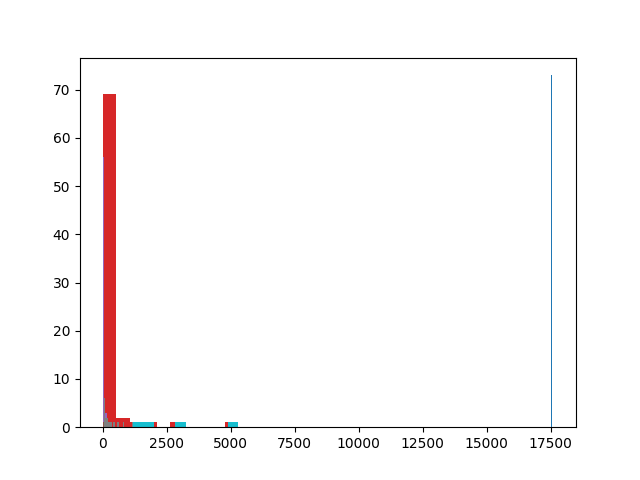

In [33]:
size_batches = sorted(size_batches)
plt.hist(size_batches[-4:])
plt.show()

In [46]:
np.quantile(size_batches,0.9)
for size in size_batches:
    if size > 40:
        print(size)

41
46
50
57
64
74
84
99
115
135
159
192
231
283
360
458
607
822
1180
1786
2988
5304


In [87]:
def seprate_batches(self,num_batches):
    batches = dict()
    size_batches = dict()
    batches_to_fill = set(list(range(num_batches)))
    batches_empty = set(list(range(num_batches)))

    for i in range((num_batches)):
        batches[i] = []
        size_batches[i] = 0

    mean_size = sum([len(cycle) for cycle in self.open_paths])/num_batches
    print(mean_size)
    print(batches_to_fill)

    self.open_paths = (sorted(self.open_paths,key = lambda x: len(x)))[::-1]
    
    for open_path in tqdm(self.open_paths):
        size = len(open_path)
        if size > mean_size:
            batch = batches_empty.pop()
            batches[batch].append(open_path)
            size_batches[batch] += size
            batches_to_fill.remove(batch)
        else:
            batches_possible = [batch for batch in batches_to_fill if size_batches[batch] + size < mean_size]
            assert len(batches_possible) > 0, "Error in the batches"
            batch = batches_possible[0]
            
            if batch in batches_empty:
                batches_empty.remove(batch)
            batches[batch].append(open_path)
            size_batches[batch] += size
            if size_batches[batch] > mean_size:
                batches_to_fill.remove(batch)
        
        
    return batches,size_batches

In [84]:
batches,size_batches = seprate_batches(C,1000)

1314.533
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

100%|██████████| 15684/15684 [00:01<00:00, 13399.46it/s]


(array([857.,  72.,  40.,  14.,   8.,   4.,   1.,   0.,   1.,   3.]),
 array([    0. ,  1760.7,  3521.4,  5282.1,  7042.8,  8803.5, 10564.2,
        12324.9, 14085.6, 15846.3, 17607. ]),
 <BarContainer object of 10 artists>)

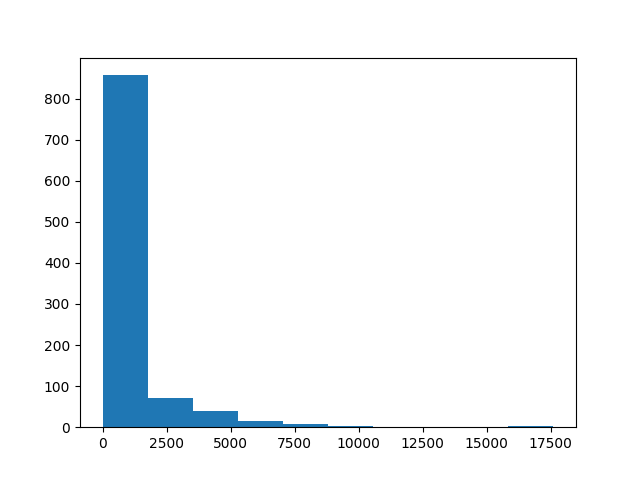

In [85]:
sizes = size_batches.values()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(sizes)

In [76]:
size_batches,batches_to_fill,open_path =({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0}, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}, [596092, 596061, 12232, 602795, 1290710, 18305, 609576, 1297205, 18280, 1290676, 12231, 596060, 1284304, 6122, 1277862, 589384, 1277847, 589366, 589340, 6052, 596000, 1284250, 12201, 602726, 1290625, 1290624, 602699, 1290591, 18201, 609439, 609407, 1297045, 24263, 30391, 36403, 629704, 1316659, 629703, 1316686, 629702, 1316658, 36374, 1310101, 36373, 629665, 36340, 1310075, 36341, 629630, 36311, 1310033, 622815, 1310001, 622779, 1309972, 622778, 1310000, 36282, 629598, 1316601, 629629, 36338, 1310073, 30334, 24201, 1296981, 18071, 1290462, 12037, 1284051, 5902, 589240, 5931, 1284084, 12067, 602606, 12095, 5957, 589280, 1277762, 5988, 595900, 595868, 595835, 5900, 1277713, 5901, 1284050, 12036, 602546, 1290427, 12007, 1284019, 1284020, 595780, 595744, 595715, 11926, 602416, 602388, 17901, 609135, 1296761, 23989, 615926, 1303260, 615885, 1303220, 23928, 609046, 1296665, 23893, 30029, 1309753, 30028, 1303188, 615859, 1303219, 615884, 1303259, 1303258, 615925, 23987, 609133, 1296792, 609132, 23986, 615924, 23960, 1296733, 23959, 615883, 30059, 1309789, 622583, 622614, 30114, 1303287, 30115, 622615, 36094, 1316369, 1316370, 36095, 1309818, 622585, 1309790, 622586, 1309819, 622616, 30116, 23988, 609134, 17900, 1290269, 602387, 1290304, 1290305, 602417, 17961, 1296858, 24083, 616073, 30237, 1309971, 622777, 1309999, 30264, 24141, 1296920, 609252, 1296891, 24111, 1303401, 616100, 1303435, 1303434, 616130, 1303470, 1303471, 24172, 609295, 609254, 1296892, 609253, 1296921, 24142, 30265, 622816, 622844, 1310076, 622870, 622903, 622931, 1310158, 30416, 24300, 1297077, 24299, 1303595, 616280, 1303628, 24334, 1297108, 609480, 24362, 1303657, 616311, 24335, 1297109, 609440, 1297078, 609408, 24264, 616224, 24235, 1297020, 609350, 1296983, 1296984, 1296985, 24204, 1303510, 616197, 24236, 609351, 18072, 602551, 1290431, 602552, 12039, 5905, 589216, 1277695, 589215, 5904, 1284052, 12038, 602580, 1290495, 12069, 595870, 12098, 1290524, 12097, 595902, 12120, 1290557, 1290558, 602636, 18129, 1297046, 609409, 18169, 602661, 1290592, 1290593, 602700, 602727, 1290652, 602728, 12170, 595962, 595934, 1284145, 1284146, 595904, 1284118, 5960, 1277749, 589285, 5992, 595906, 1284120, 595874, 1284088, 595873, 1284119, 595905, 595935, 6021, 1277787, 589320, 1277810, 6053, 595964, 12150, 18202, 24336, 616283, 24302, 18171, 602638, 18134, 24266, 1303574, 616256, 1303598, 24301, 1297080, 609441, 609481, 1297141, 609482, 609442, 1297081, 609411, 1297049, 24265, 1303572, 616255, 1303597, 616254, 1303571, 616226, 616198, 1303511, 616199, 616227, 1303573, 616228, 24237, 609381, 18133, 602608, 18106, 609352, 24205, 616164, 1303473, 30301, 622819, 1310004, 622781, 36258, 42338, 636436, 42368, 1316577, 629604, 1316604, 629631, 42425, 636502, 48552, 54654, 1336240, 650018, 649985, 649948, 60734, 1342758, 1342759, 656702, 66936, 1349383, 663498, 663468, 1349318, 663467, 1349350, 1349349, 1349348, 663497, 72924, 670385, 78881, 84889, 684038, 84864, 1362456, 677207, 78882, 670386, 78905, 84919, 1369051, 684075, 84890, 677208, 78851, 670312, 1355860, 78820, 1362426, 84837, 1368956, 683961, 683925, 1368900, 683897, 90840, 690655, 1375357, 690629, 1375325, 90769, 84699, 677000, 78636, 670116, 1355699, 72697, 663247, 663222, 66626, 1342455, 60440, 649640, 1335818, 649639, 1335852, 54327, 1329330, 54326, 1335851, 649676, 60467, 1342485, 66657, 663246, 66691, 656477, 60539, 1335947, 54413, 643006, 1329389, 48246, 636143, 1322873, 42050, 629272, 1316285, 629273, 1316248, 1316249, 42051, 636144, 1322902, 48247, 54384, 1335913, 60504, 1342514, 66690, 663245, 66656, 1342484, 60466, 649675, 649637, 54301, 642882, 48128, 1322762, 41957, 1316163, 41958, 1322763, 48129, 1329273, 54270, 60382, 1342400, 60383, 649568, 60360, 1342367, 66538, 663124, 1349037, 663123, 72576, 669956, 669921, 78464, 676771, 84465, 683585, 90541, 690385, 96583, 102505, 1388448, 108493, 1395097, 711113, 1395125, 711144, 108546, 704201, 1388482, 704171, 704143, 1388415, 102476, 697205, 697179, 1381716, 697180, 697206, 1381765, 697207, 96520, 1375025, 1375026, 90458, 1368502, 1368501, 683502, 1368478, 90440, 690291, 690322, 1375065, 690323, 690292, 1374996, 96496, 697147, 96464, 1374966, 96465, 697148, 1381719, 697149, 96466, 690233, 690202, 690177, 1374867, 1374868, 690146, 96336, 697008, 1381599, 697007, 696980, 102257, 703853, 102218, 696948, 96304, 1374806, 96303, 696947, 696914, 1381480, 1381481, 102189, 108158, 1394755, 1394754, 710771, 1394788, 1394789, 108191, 102219, 96274, 690046, 90200, 1368246, 683211, 1368221, 84084, 1361649, 84083, 90168, 689969, 96169, 696822, 102118, 1388000, 1387999, 703680, 1387965, 703679, 703715, 703749, 102167, 696887, 1381478, 696888, 696857, 696820, 696787, 1381353, 696788, 696821, 696858, 696889, 1381479, 696913, 102217, 703815, 1388081, 703814, 102216, 96273, 1374786, 690082, 1374805, 90257, 1368307, 683270, 1368282, 1368283, 1368284, 683271, 683296, 84201, 676485, 84171, 90258, 1374807, 690110, 90290, 683332, 84235, 1361789, 84236, 683366, 84265, 1361815, 78249, 1355269, 669722, 72354, 662869, 1348819, 66338, 1342158, 1342159, 60178, 1335557, 649327, 60150, 1342131, 656052, 66277, 662813, 66248, 60104, 1335469, 53919, 47797, 41625, 628796, 1315793, 35555, 1309226, 29538, 1302689, 23375, 1296161, 17285, 601695, 1289607, 601696, 11252, 5099, 1277149, 1277150, 5100, 1283286, 1283285, 1283284, 595012, 1283317, 1283318, 11278, 1289656, 17316, 608568, 608591, 17371, 1289724, 11331, 1283379, 1283380, 5195, 1277215, 5196, 1283381, 11332, 601795, 11303, 1283354, 595044, 5128, 1277166, 1277165, 5127, 595043, 1283353, 11302, 601763, 601730, 1289633, 1289634, 1289635, 11253, 1283287, 594985, 11231, 601697, 601731, 17317, 608528, 608501, 1296131, 608467, 1296100, 608466, 17261, 601660, 1289583, 1289582, 11200, 1283232, 5038, 1277119, 1277118, 588595, 588611, 1277148, 5098, 595010, 11277, 601728, 1289632, 601729, 601762, 1289696, 1289697, 17340, 1296223, 1296222, 17339, 11301, 595042, 595011, 594984, 594955, 11199, 17230, 1296096, 608440, 1296061, 608404, 1296031, 608371, 1295997, 1295996, 608370, 17172, 11135, 1283167, 1283168, 11136, 601612, 17202, 1296062, 608441, 1296097, 1296098, 1296099, 23316, 1302630, 1302631, 23317, 1296101, 608442, 1296065, 608407, 1296034, 1296033, 608406, 23283, 29471, 621908, 1309108, 1309109, 29447, 615207, 1302602, 615243, 23318, 17231, 11201, 594956, 5073, 1277135, 1277136, 588612, 1277152, 5103, 11256, 601733, 1289657, 601732, 11255, 5102, 1277151, 5101, 595014, 5130, 1277168, 1277167, 5129, 1283319, 595013, 11254, 601698, 17262, 23348, 1302656, 23349, 608502, 1296163, 608529, 1296195, 608569, 1296224, 23437, 29591, 622058, 622024, 35557, 1315794, 628767, 35521, 1309192, 29516, 615301, 615328, 1302713, 23405, 1296194, 1296193, 608527, 23376, 615300, 29515, 1309191, 35520, 628730, 1315725, 35485, 621939, 1309135, 621940, 35486, 628731, 1315760, 41556, 635607, 1322345, 635606, 1322383, 635647, 1322407, 635677, 635709, 41656, 1315848, 41657, 1322460, 47835, 642551, 1328955, 642552, 1328978, 642576, 1329004, 642575, 53955, 1335500, 1335501, 649293, 53982, 47867, 635776, 1322520, 635809, 41756, 1315950, 628958, 41788, 635838, 41755, 628917, 35691, 1309337, 622114, 35647, 1315884, 41689, 635740, 1322461, 47836, 642553, 53921, 1335470, 53920, 642515, 642485, 1328899, 1328900, 1328901, 642486, 1328928, 1328929, 642517, 47799, 635680, 1322410, 47767, 53887, 649191, 1335403, 649157, 53833, 1328876, 642449, 53861, 649190, 60079, 1342029, 655998, 60105, 649259, 1335502, 60127, 1342099, 656053, 66306, 1348789, 72355, 78279, 676583, 676549, 1361790, 676523, 1361766, 676487, 1361744, 84173, 1368308, 683298, 84203, 78177, 669652, 1355234, 78212, 1361788, 84234, 683331, 1368333, 683330, 84233, 676522, 78176, 669651, 669688, 1355267, 1355268, 78248, 84264, 90356, 690203, 1374937, 1374936, 96435, 697081, 96400, 90355, 683364, 1368359, 1368358, 683329, 1368332, 90289, 690145, 1374866, 96368, 697006, 102287, 703885, 1388147, 108217, 1394818, 114116, 1401384, 114117, 1394819, 710835, 710873, 114172, 120015, 1408049, 724746, 1408083, 724779, 125836, 1414847, 731568, 1414814, 1414815, 731534, 731503, 125756, 724682, 1407984, 1407983, 724681, 1408021, 724714, 1408047, 724743, 1408081, 1408082, 724745, 120014, 1401447, 717846, 717881, 1401507, 1401506, 120078, 1408115, 125835, 131479, 1421559, 1421560, 137095, 745592, 137119, 1421590, 1421589, 131508, 731645, 125880, 724832, 724803, 120077, 1401505, 717880, 1401470, 1401469, 717845, 120012, 724742, 1408080, 724741, 120011, 114169, 1394880, 1394879, 710868, 710828, 114112, 717755, 1401344, 114088, 1394784, 108189, 102214, 696943, 96298, 1374804, 690107, 1374832, 90286, 683326, 1368354, 683358, 84260, 1361811, 84261, 683359, 1368355, 90325, 1374864, 96365, 697041, 96397, 1374897, 96398, 697042, 96366, 90326, 1368356, 683361, 1368386, 683360, 683327, 84199, 78174, 1355196, 78173, 84198, 683293, 1368304, 90254, 690079, 90229, 1368280, 683242, 683208, 1368214, 90167, 96199, 696853, 1381414, 102140, 1388027, 703747, 102165, 696883, 102187, 703779, 108130, 710693, 710656, 710620, 710594, 1394598, 1394599, 710556, 107968, 703611, 1387929, 1387928, 703641, 102091, 1381349, 96110, 1374622, 689896, 1374654, 96138, 1381386, 696818, 96164, 689964, 96198, 696851, 102138, 108095, 710655, 1394656, 710654, 114011, 1401251, 717616, 717578, 113953, 1394632, 710592, 107995, 102055, 1381318, 96082, 90050, 1368081, 90049, 1374589, 689864, 1374620, 90086, 683077, 83964, 676246, 77971, 1354975, 669377, 77943, 676247, 676277, 77996, 669441, 1355041, 1355042, 669474, 669504, 1355105, 1355106, 72192, 1348602, 662664, 1348569, 72167, 1355073, 669475, 72131, 662631, 662663, 1348601, 72191, 78086, 676414, 1361708, 78112, 669536, 1355104, 78084, 676379, 1361647, 676380, 78085, 669503, 78047, 676342, 1361619, 1361620, 84046, 683146, 1368149, 683147, 1368184, 683148, 84020, 676278, 83986, 1368114, 90088, 96109, 1381348, 96108, 689866, 90052, 1368083, 83965, 1361526, 1361525, 676216, 1361494, 83936, 683010, 1368008, 682976, 83882, 676122, 77819, 71930, 662378, 1348285, 1348284, 71894, 669178, 1354766, 1354767, 669179, 77784, 1361361, 1361362, 676090, 77820, 669244, 77847, 676124, 1361396, 676123, 83883, 1367969, 89964, 1374504, 689742, 95966, 696615, 696651, 1381263, 696652, 101963, 703517, 703489, 703457, 1387721, 1387722, 703429, 1387685, 703400, 1387646, 703401, 1387686, 107795, 1394400, 710334, 1394363, 113683, 717270, 1400945, 717302, 113748, 710363, 1394399, 710362, 107819, 703428, 1387684, 1387683, 1387682, 703427, 1387720, 703456, 1387752, 101894, 696577, 1381202, 95965, 689695, 1374445, 689664, 95891, 1381136, 696543, 101893, 1387751, 703488, 101928, 1381201, 696613, 1381232, 101961, 107906, 710481, 107936, 101991, 1381261, 96024, 689765, 689740, 1374475, 95964, 696576, 95930, 1374444, 95929, 101892, 703455, 1387718, 1387719, 107817, 710361, 1394397, 1394398, 710332, 710305, 107734, 703337, 1387592, 101750, 1381016, 696362, 1380988, 696363, 1381017, 696406, 696446, 696480, 95858, 689592, 1374340, 689593, 95859, 696516, 1381139, 1381138, 696544, 1381169, 95931, 689665, 95892, 696514, 1381110, 101847, 703399, 107762, 1394358, 710331, 1394396, 113705, 1400943, 113706, 107794, 101846, 696478, 1381076, 1381077, 95839, 1374338, 689560, 1374305, 689522, 89773, 682731, 682772, 83753, 675957, 1361234, 1361235, 83721, 682732, 682699, 83666, 77605, 71719, 1348098, 662203, 1348124, 1348125, 662232, 71782, 669042, 71746, 662204, 662173, 65586, 655320, 1341394, 1341395, 65557, 1348035, 1348034, 662115, 662069, 662034, 71561, 77471, 1360991, 675680, 675651, 83457, 682473, 682499, 682523, 83542, 675741, 1361064, 77527, 1354502, 668869, 1354472, 1354473, 71594, 65487, 1341312, 65488, 1347958, 662070, 1348001, 65526, 1341360, 65527, 662071, 65489, 1341313, 59394, 1334743, 1334742, 1334741, 648442, 648480, 1334805, 53278, 1328279, 53277, 1334804, 53276, 47136, 40961, 1315125, 40962, 1321718, 47137, 641778, 641745, 1328217, 1328218, 641709, 53190, 1334707, 53191, 47040, 40882, 34810, 1308487, 621238, 1308515, 621239, 1308488, 621240, 28880, 614539, 1301943, 28852, 621202, 28824, 614508, 22682, 607691, 1295363, 1295364, 607666, 16528, 1288813, 16527, 607636, 16498, 1288784, 10424, 1282456, 594134, 1282494, 594161, 4364, 588043, 1276636, 588021, 1276618, 4305, 1282455, 594133, 10456, 600840, 600811, 16466, 607552, 1295245, 1295244, 607551, 607588, 22564, 1301839, 614424, 1301872, 614467, 22645, 1295361, 1295360, 22644, 614466, 1301870, 614465, 22643, 1295359, 16555, 1288839, 600867, 16522, 607632, 16495, 600807, 1288747, 600778, 10357, 594070, 594104, 10421, 16496, 607633, 16523, 10454, 1282492, 1282493, 4334, 588020, 1276617, 587998, 4280, 594071, 4253, 1276573, 4252, 1282392, 10358, 600748, 16408, 1295208, 607485, 607455, 1295145, 22427, 614240, 1301666, 22403, 607391, 1295073, 1295072, 607390, 16316, 600627, 1288554, 600592, 1288529, 1288528, 16262, 607313, 1294999, 607314, 22352, 614139, 1301568, 614110, 1301540, 1301541, 28471, 1308056, 28470, 614077, 22268, 1294933, 16175, 1288428, 1288429, 600456, 16147, 607222, 607249, 1294964, 16209, 1288467, 600534, 600563, 16263, 22353, 28537, 1308129, 620892, 34523, 627644, 34497, 620857, 1308100, 620828, 1308057, 620795, 620757, 28413, 614043, 1301508, 1301507, 1301506, 28438, 620756, 620726, 34348, 1314505, 40444, 634339, 1321054, 46526, 641091, 46498, 1321017, 634264, 1320987, 634238, 634205, 634175, 40269, 627249, 40239, 46352, 640896, 640866, 1327379, 1327378, 640865, 1327418, 46328, 634067, 1320799, 1320798, 40170, 1314200, 40171, 46294, 640833, 640803, 1327313, 46232, 1320734, 634000, 634033, 40172, 1314201, 34092, 620401, 34054, 1314171, 627147, 34091, 28103, 613692, 613727, 1301214, 28162, 1307740, 620464, 34126, 1314230, 40201, 1320828, 634109, 40238, 1314265, 627209, 1314231, 40202, 634068, 1320800, 1320801, 40173, 1314202, 627174, 1314232, 627211, 34160, 28165, 1301215, 28166, 620466, 1307702, 34128, 40203, 1320829, 46329, 1327419, 52508, 647633, 52483, 1327381, 46297, 40175, 1314203, 627176, 40204, 634070, 46298, 1327382, 52484, 58615, 64700, 661145, 1347095, 661146, 64701, 654363, 1340485, 654390, 654427, 58703, 647694, 647661, 1333933, 647634, 1333895, 647601, 58587, 1340425, 58586, 647600, 52485, 1327383, 640867, 46332, 634071, 634036, 634003, 1320736, 46235, 640772, 640734, 1327245, 52372, 647515, 1333810, 52400, 640770, 640807, 46267, 1320772, 634035, 1320803, 634069, 1320830, 634110, 1320870, 634111, 1320831, 46330, 640897, 640931, 1327475, 640932, 1327445, 640933, 1327476, 52573, 647732, 1334021, 1334020, 647756, 58754, 654492, 1340582, 64820, 661276, 661235, 661202, 70869, 1353665, 668003, 76842, 82869, 1366817, 681755, 681722, 82813, 674894, 674931, 76843, 668037, 1353729, 76873, 1360297, 674963, 1360265, 1360266, 674932, 1360238, 674895, 1360204, 76789, 70833, 1347128, 1347129, 70834, 667974, 70870, 1347163, 661203, 1347193, 70901, 1353700, 70900, 1347192, 64757, 58671, 1333974, 1333975, 52540, 46356, 1320872, 46357, 1327446, 640935, 1327477, 52575, 647695, 52541, 1327447, 52542, 647664, 647636, 1333897, 1333898, 647603, 52458, 640809, 52429, 1333845, 52430, 1327319, 1327320, 46237, 1320739, 1320738, 46236, 640810, 1327349, 640837, 46300, 40178, 627180, 1314237, 627218, 34163, 1307745, 1307746, 34164, 627219, 40207, 1320834, 1320833, 40206, 627179, 1314204, 40177, 1320805, 1320804, 634038, 46269, 52455, 58588, 654295, 654265, 654236, 654202, 654167, 1340263, 654138, 1340233, 654139, 654169, 1340301, 58475, 1333744, 647486, 1333780, 52374, 640735, 46207, 1320706, 1320707, 40073, 1314099, 33999, 620335, 28056, 21906, 15782, 1288018, 600016, 599980, 1287954, 599981, 15762, 606764, 21837, 1301031, 613563, 1301068, 1301067, 613601, 1301095, 613637, 28079, 620369, 620332, 1307589, 33998, 627093, 627121, 34060, 1307651, 34061, 627150, 34096, 1307673, 34095, 627177, 1314235, 627214, 40242, 46355, 52538, 647663, 58645, 654364, 654329, 1340426, 64669, 1347096, 70800, 667918, 76719, 674823, 76757, 1353609, 70801, 1347097, 64670, 1340427, 654330, 654365, 58646, 52509, 1327421, 1327420, 46331, 1320832, 634112, 1320871, 634138, 1320902, 46383, 640960, 640991, 46443, 634239, 1320989, 634267, 634303, 1321055, 1321056, 634340, 1321094, 1321093, 634365, 1321127, 46586, 52780, 647900, 1334195, 647873, 58844, 1340712, 1340711, 654631, 1340740, 654630, 654605, 58816, 647845, 52724, 1327630, 641123, 641156, 1327699, 1327698, 52779, 1334224, 58891, 1340775, 64994, 71129, 77075, 83086, 1367071, 89172, 1373588, 1373589, 1373590, 89174, 1367072, 682042, 1367111, 682075, 682116, 89256, 1373689, 688907, 89281, 682142, 1367163, 1367162, 682115, 83150, 1360592, 675273, 675315, 675347, 77208, 668475, 668509, 1354184, 668548, 1354225, 668549, 71336, 661732, 1347637, 71301, 668510, 77254, 1360750, 675408, 1360723, 675380, 675348, 675316, 1360627, 1360628, 77158, 668354, 1354014, 77126, 675251, 675222, 1360520, 675185, 1360478, 83063, 1367043, 682011, 1367073, 682043, 682077, 83151, 675276, 77157, 71215, 661612, 65115, 654789, 65088, 661575, 1347509, 71180, 668316, 1353983, 668317, 77127, 83152, 1367135, 682118, 83193, 675318, 1360657, 675319, 83194, 682119, 682078, 682046, 1367075, 682045, 1367112, 682044, 1367074, 682012, 1367044, 681973, 1367016, 89118, 688709, 1373490, 688708, 688732, 95162, 1380332, 101154, 702573, 1386825, 702535, 1386797, 1386798, 1386799, 1386800, 702503, 1386764, 101063, 695552, 101100, 1386801, 107002, 709470, 112979, 716392, 1400065, 1400064, 716391, 1400098, 118798, 124593, 730159, 1413321, 730128, 130173, 737082, 1420104, 737083, 1420065, 1420066, 1420067, 1420068, 737047, 135767, 743995, 1426888, 744026, 744058, 744095, 1426991, 744094, 1426958, 141401, 751127, 1433789, 751094, 1433759, 146845, 1440576, 758138, 1440547, 758139, 1440577, 1440578, 758140, 1440549, 758141, 1440579, 152313, 1447516, 765247, 1447542, 765285, 1447575, 765284, 1447541, 765246, 765216, 157533, 772310, 1454510, 1454511, 772278, 1454473, 1454474, 157502, 765138, 1447448, 765179, 157535, 772312, 1454512, 772311, 162836, 779683, 1461629, 779643, 1461587, 1461588, 779606, 1461550, 779568, 1461513, 1461514, 1461515, 779569, 779607, 1461591, 779608, 779570, 779540, 1461473, 1461472, 779499, 1461423, 1461424, 1461425, 779462, 1461374, 779424, 1461336, 779392, 1461299, 779354, 779321, 1461213, 779322, 1461257, 1461258, 779323, 1461214, 779281, 1461171, 1461172, 779244, 1461136, 779209, 1461089, 779208, 1461135, 1461134, 779243, 1461170, 779280, 1461212, 779320, 1461256, 779353, 1461297, 779352, 1461255, 779319, 779279, 1461169, 167778, 1468330, 786500, 172962, 1475424, 178060, 183071, 1489150, 807605, 1489120, 1489119, 807604, 183070, 800677, 1482475, 1482476, 800678, 1482512, 178061, 793665, 172987, 1468331, 786541, 1468372, 1468373, 1468374, 786542, 1468332, 172988, 178078, 183082, 807631, 183072, 178062, 172964, 167759, 779207, 1461088, 779206, 779241, 167779, 786501, 172963, 1475425, 793664, 1475461, 1475462, 1475463, 793702, 1475501, 793741, 1475554, 793785, 793824, 1475642, 1475641, 793823, 793784, 1475552, 1475553, 793740, 1475500, 1475499, 793739, 1475551, 793783, 1475599, 793822, 173064, 786648, 1468463, 786612, 1468416, 786570, 1468371, 786540, 1468329, 1468328, 786539, 786569, 1468415, 786611, 173039, 793782, 1475550, 793781, 173038, 1468462, 786647, 1468500, 1468499, 786680, 1468530, 786720, 1468574, 786760, 786804, 1468643, 786846, 1468681, 786889, 1468723, 786929, 1468767, 786976, 1468809, 787009, 1468847, 168016, 1461714, 1461713, 1461712, 1461711, 779724, 1461671, 779723, 779759, 1461755, 779801, 1461797, 779834, 779870, 779909, 1461915, 168118, 787222, 1469096, 787221, 1469058, 787220, 787261, 1469138, 1469137, 787306, 1469190, 787347, 168193, 163027, 1454908, 1454909, 772718, 1454950, 1454949, 772756, 1454981, 772755, 1454948, 772717, 1454907, 772674, 1454869, 772638, 162994, 780019, 1462021, 780051, 1462056, 780084, 1462092, 168216, 1469266, 173403, 794545, 1476454, 1476453, 178498, 801609, 1483431, 801568, 801520, 1483358, 1483357, 801519, 1483397, 801565, 801608, 183504, 188272, 192553, 820755, 192575, 1496281, 1496282, 815016, 1496241, 1496240, 1496239, 814975, 814930, 814890, 188215, 1489947, 808413, 1489909, 808372, 188187, 1496056, 814815, 1496084, 1496085, 814816, 1496057, 188188, 183419, 801437, 1483321, 183433, 1489910, 183434, 1483322, 801439, 1483286, 801402, 1483248, 801361, 1483211, 801360, 1483247, 801401, 801438, 178424, 1476305, 794434, 1476344, 794435, 1476306, 794401, 1476263, 1476264, 794402, 1476307, 794436, 1476346, 794437, 1476308, 178425, 801441, 1483287, 801440, 801481, 1483359, 178443, 1476348, 794438, 794403, 1476265, 794363, 1476220, 794323, 173299, 1469014, 787182, 1469057, 787183, 173300, 794290, 1476140, 794243, 1476097, 794205, 794171, 1476014, 794126, 1475974, 794093, 1475934, 1475935, 794094, 1475976, 1475975, 794127, 1476015, 794172, 1476056, 794206, 794244, 1476141, 794291, 1476183, 794292, 1476142, 794245, 1476098, 1476099, 794246, 173281, 1468981, 1468980, 787115, 1468937, 787078, 1468890, 1468891, 787046, 787006, 786973, 1468764, 786972, 1468806, 1468805, 173224, 1475973, 173223, 787005, 1468843, 787043, 1468887, 787044, 1468844, 1468845, 787045, 1468889, 1468888, 787077, 787114, 1468978, 1468979, 787157, 1469015, 168090, 779907, 162956, 772536, 157622, 765346, 1447610, 765347, 1447646, 765384, 1447680, 765419, 1447711, 765458, 1447755, 1447756, 765460, 1447712, 765461, 1447757, 765499, 1447791, 765535, 1447838, 765536, 1447792, 1447793, 765537, 157723, 772678, 1454873, 1454872, 772677, 1454910, 772676, 772640, 157683, 765459, 157659, 772571, 1454763, 772570, 1454798, 772611, 1454832, 772639, 1454871, 163011, 1462022, 780020, 779977, 1461948, 1461949, 779940, 779905, 1461874, 168089, 787156, 173280, 1476139, 794288, 1476182, 794287, 1476138, 794241, 1476095, 173262, 168047, 162894, 772421, 157570, 765276, 152351, 1440652, 1440653, 1440654, 758232, 758278, 758315, 1440763, 758316, 1440731, 758279, 1440692, 758233, 1440655, 758234, 1440693, 146903, 1433859, 146904, 758235, 1440656, 152352, 1447573, 765312, 1447612, 765350, 152392, 146927, 1433891, 146928, 758283, 1440696, 758237, 1440658, 758236, 1440695, 758282, 758319, 758359, 1440799, 758397, 146998, 751337, 1433965, 751293, 1433927, 751292, 1433964, 751291, 1433926, 751257, 1433890, 751256, 1433925, 751255, 751211, 1433858, 1433857, 751210, 1433889, 751254, 1433924, 141465, 744197, 744236, 1427131, 744282, 744327, 136015, 737348, 130387, 730362, 1413597, 1413598, 730383, 1413631, 124814, 119026, 1400368, 119025, 1406957, 1406958, 1406959, 1406960, 1406961, 119028, 1400370, 716666, 716642, 1400298, 113147, 1393714, 709689, 1393755, 709690, 1393715, 107204, 702726, 1387004, 702725, 1387029, 702755, 101304, 695859, 101328, 702798, 107241, 1393756, 709729, 1393786, 1393785, 1393784, 113208, 716704, 1400396, 119053, 723628, 119027, 1400369, 113207, 1393782, 1393783, 107270, 702829, 1387126, 107308, 1393827, 1393826, 1393825, 107307, 1387125, 101358, 1380594, 1380595, 1380596, 1380597, 101359, 702862, 107334, 709798, 1393828, 113238, 716739, 716770, 119110, 1407058, 723730, 124919, 730562, 1413796, 730563, 1413769, 730564, 730599, 124976, 723801, 723764, 1407088, 723763, 723800, 723836, 1407180, 723876, 119262, 113416, 1394073, 710060, 113449, 716965, 1400638, 1400637, 716964, 1400669, 717000, 113470, 1394129, 107548, 703146, 1387393, 1387394, 703105, 1387362, 107494, 710019, 113388, 716907, 716879, 1400533, 716838, 1400496, 113309, 709874, 1393895, 107355, 702932, 702977, 101450, 696023, 695994, 695957, 1380625, 695929, 1380598, 695896, 1380562, 101331, 107272, 1393789, 709730, 1393757, 709691, 1393716, 113148, 1400299, 716643, 1400341, 1400342, 716644, 1400300, 716609, 118939, 723527, 723560, 119002, 113183, 107242, 702756, 1387030, 107205, 709662, 113115, 1400265, 716578, 716541, 118876, 723430, 1406751, 723398, 1406724, 118825, 1400135, 716436, 112983, 1393518, 709473, 1393483, 107005, 702541, 1386830, 107035, 709513, 1393551, 107064, 1386866, 107063, 709542, 1393594, 1393593, 113026, 118849, 124639, 1413430, 124638, 723429, 118875, 113058, 709608, 107149, 702696, 101264, 695751, 695720, 1380402, 695719, 1380441, 695718, 1380401, 101211, 107124, 113057, 1400201, 716503, 113025, 1393591, 1393592, 709575, 1393626, 709576, 107096, 101189, 695679, 1380403, 695680, 695645, 1380335, 695646, 101190, 702602, 101157, 695607, 1380295, 95127, 1373525, 688737, 89149, 1367045, 682015, 682049, 1367113, 83125, 675226, 83092, 682016, 1367046, 89150, 688774, 1373597, 1373596, 688773, 95167, 695606, 101136, 702540, 101104, 95096, 688713, 1373524, 95126, 1380294, 101135, 702539, 107004, 709439, 106976, 702504, 101103, 695580, 1380293, 95125, 688712, 1373492, 89087, 1366981, 83007, 675121, 675157, 1360482, 675188, 83091, 1367076, 83090, 1360522, 83089, 682014, 89148, 1373557, 89147, 682013, 682047, 682079, 83154, 1360595, 83153, 1367136, 89225, 688881, 688910, 89286, 682146, 83195, 1360630, 675320, 1360658, 675349, 1360689, 83248, 1367226, 682183, 1367196, 682145, 1367164, 89257, 1373691, 95276, 101262, 1387000, 702723, 107202, 709657, 1393686, 113112, 1400263, 118935, 1406854, 124722, 1413531, 730331, 1413559, 130388, 1420329, 737309, 1420293, 737278, 1420262, 737279, 1420294, 135965, 744285, 135984, 1420330, 737350, 1420359, 1420358, 737349, 135983, 744283, 1427132, 141514, 1433999, 751370, 141543, 744329, 141570, 751437, 141594, 744395, 141620, 751507, 141649, 1427296, 1427297, 141650, 1434147, 751547, 147158, 758625, 758593, 1440979, 758558, 1440945, 152521, 1447873, 1447872, 1447871, 152520, 758557, 1440978, 758591, 152559, 1447954, 765675, 157816, 1455047, 772843, 1455018, 772844, 157817, 765677, 1447955, 765676, 1447993, 765719, 765744, 152629, 758721, 1441141, 758763, 1441187, 758802, 758839, 1441249, 758840, 1441219, 758803, 147265, 1434297, 751709, 1434339, 751743, 141828, 136298, 737680, 1420662, 737681, 136299, 744707, 744738, 141890, 751807, 751777, 1434375, 1434376, 751745, 1434340, 1434341, 141808, 136259, 1420664, 130658, 1413918, 730656, 1413865, 730627, 1413829, 130599, 737574, 737536, 136145, 1427353, 136144, 737535, 1420560, 737573, 1420591, 737610, 1420626, 737650, 737679, 130685, 1413948, 730684, 1413914, 1413915, 730685, 125060, 1407240, 1407239, 723937, 1407270, 723981, 119359, 717072, 119388, 724023, 125115, 730749, 130714, 136331, 141856, 751806, 1434440, 751841, 141913, 1427596, 141914, 147404, 1441343, 147405, 1434473, 751842, 1434441, 1434442, 141888, 1427566, 141889, 1434443, 751843, 1434475, 147406, 758971, 759003, 152866, 766085, 1448386, 766121, 766157, 1448451, 766193, 766230, 1448516, 158245, 773411, 773366, 1455553, 773328, 773293, 163374, 1462623, 1462624, 780647, 1462593, 780648, 780681, 1462657, 163397, 773329, 158190, 1448452, 766158, 158159, 163398, 1462658, 780714, 1462689, 780715, 1462659, 780682, 163377, 773247, 773215, 158069, 1448327, 152842, 759005, 147467, 751902, 147443, 758972, 758942, 152793, 765985, 158044, 773187, 773216, 773248, 1455488, 158131, 766124, 766161, 152949, 1441515, 152950, 766162, 152926, 1441482, 152925, 158160, 773295, 773249, 1455452, 1455453, 1455454, 773251, 158133, 1448389, 766089, 1448361, 158106, 773217, 773190, 1455384, 158047, 765987, 152795, 758912, 1441294, 758876, 152743, 765916, 1448232, 157990, 1455323, 1455322, 773124, 163276, 1462495, 780552, 780589, 168536, 1469739, 1469740, 787899, 168567, 1462600, 163359, 1455456, 773253, 1455490, 773297, 1455528, 1455527, 163400, 780687, 1462628, 780686, 168618, 1469842, 787982, 168645, 163422, 773372, 1455591, 163453, 1462729, 163452, 773371, 163421, 780717, 780685, 1462627, 780650, 1462598, 780625, 163330, 773218, 158107, 766090, 1448391, 766127, 766164, 158194, 1455560, 1455561, 773334, 158166, 766166, 1448457, 766200, 152975, 147591, 752062, 1434724, 752061, 752031, 147557, 759108, 1441483, 759107, 759140, 1441553, 759179, 1441585, 152998, 766235, 766199, 1448455, 1448456, 766165, 158165, 163401, 780688, 163380, 773254, 1455457, 163360, 1462601, 1462602, 168568, 1469776, 168569, 1462603, 1462604, 1462605, 780652, 1462633, 1462632, 168596, 1469813, 1469812, 168595, 780690, 1462664, 1462663, 168619, 1469843, 787955, 1469811, 173753, 178820, 183824, 1490624, 183825, 178821, 795113, 795141, 1477020, 178874, 802244, 1484018, 183853, 1490660, 183852, 1484017, 178852, 795112, 1476955, 795074, 1476928, 795040, 1476894, 795039, 1476927, 173722, 787929, 787954, 787983, 788015, 168671, 780762, 163423, 773373, 1455592, 773417, 1455629, 163481, 1462756, 1462757, 163482, 1455630, 1455631, 163483, 1462759, 1462760, 780826, 1462798, 780825, 163484, 773453, 773492, 1455702, 773491, 773452, 158251, 1448525, 158250, 773451, 158278, 766324, 1448596, 1448597, 766325, 1448562, 153035, 1441620, 759250, 1441644, 147668, 1434793, 752130, 1434762, 147638, 1441619, 153034, 766284, 766239, 1448494, 766202, 766169, 1448423, 766130, 1448393, 158136, 1455492, 163381, 1462631, 780689, 163402, 773335, 1455562, 163424, 1462692, 1462693, 163425, 1455563, 158196, 152952, 147559, 1434656, 752005, 1434620, 752006, 752033, 752064, 142122, 745017, 744984, 1427773, 142060, 147560, 1441521, 759109, 1441486, 1441487, 152928, 1448424, 766170, 766203, 1448495, 766240, 1448526, 158252, 773418, 163455, 780763, 1462695, 780722, 1462666, 1462667, 168621, 787956, 168598, 780653, 163361, 773220, 163333, 1462566, 780593, 1462532, 780557, 1462498, 163281, 773159, 1455388, 773194, 163332, 1462565, 1462564, 1462563, 780592, 780555, 1462497, 780554, 780591, 163331, 1455420, 1455421, 1455422, 773193, 773158, 773128, 1455329, 157992, 152771, 1441297, 758916, 147384, 1434447, 751816, 141865, 744745, 744776, 136395, 737823, 136422, 1427645, 136423, 737824, 130789, 1414056, 125147, 724063, 1407363, 119417, 717114, 1400759, 119398, 724035, 723989, 125097, 130724, 1420741, 1420740, 737758, 1420780, 1420781, 130753, 1414026, 1414027, 1414028, 730761, 730733, 130696, 737689, 1420671, 1420672, 1420673, 130668, 730699, 1413957, 1413958, 1413959, 730734, 125098, 723955, 1407250, 723920, 1407217, 723919, 125072, 130698, 136309, 744685, 1427490, 1427491, 744647, 136239, 1420640, 737657, 1420674, 737690, 737728, 1420746, 737762, 130755, 730764, 1413992, 130725, 737761, 1420783, 737760, 737726, 1420704, 737725, 1420744, 737759, 1420782, 737791, 1420814, 1420813, 136396, 1427609, 1427610, 744777, 141896, 751849, 1434482, 751873, 751913, 1434551, 147475, 152874, 158109, 773221, 158074, 766027, 1448300, 765994, 1448267, 765993, 1448299, 765992, 765953, 765920, 1448209, 1448208, 157964, 1455285, 163239, 780457, 1462392, 780456, 780488, 780519, 780556, 1462531, 168511, 787829, 1469677, 787828, 1469712, 787863, 1469742, 787862, 787827, 1469676, 787789, 1469645, 787750, 168445, 163238, 157963, 765919, 1448235, 765918, 1448205, 1448206, 1448207, 765884, 1448171, 1448170, 157931, 1455242, 773063, 773097, 1455328, 773096, 1455284, 773062, 163214, 1462390, 163213, 773061, 773095, 1455327, 773127, 1455357, 1455356, 773157, 1455386, 163304, 780590, 168537, 173700, 1476893, 795006, 1476850, 795005, 1476892, 795038, 1476926, 795073, 795110, 178851, 1484016, 802205, 802167, 1483938, 802129, 1483904, 802095, 1483862, 183752, 808959, 1490467, 808958, 1490514, 1490513, 188499, 1496649, 1496650, 815382, 188473, 183726, 802049, 1483861, 1483860, 1483859, 802094, 178777, 795036, 1476925, 795037, 178778, 802128, 1483937, 802166, 802204, 1484015, 802203, 802165, 1483936, 1483935, 802164, 1483974, 178818, 1476952, 795072, 1476924, 795035, 1476890, 178776, 802093, 1483858, 802048, 1483820, 802047, 1483857, 802092, 178775, 1476889, 1476888, 1476887, 1476886, 1476885, 173695, 787856, 1469705, 787820, 787785, 1469638, 787744, 1469606, 787743, 1469637, 787784, 787819, 1469704, 787855, 173694, 795034, 795068, 1476950, 173749, 787925, 1469773, 1469772, 787924, 787951, 1469837, 173768, 795105, 178815, 802162, 1483932, 178798, 1476922, 1476921, 795067, 1476949, 173748, 1469800, 787950, 787976, 1469864, 787977, 1469836, 787978, 1469865, 788006, 173813, 178894, 802267, 183879, 1490681, 809133, 1490654, 1490655, 809099, 809064, 1490584, 1490583, 809027, 1490543, 808988, 1490505, 808953, 1490459, 1490460, 188471, 192746, 821077, 1502130, 821076, 192745, 1496604, 815374, 1496643, 815375, 1496605, 815338, 1496570, 188454, 1490420, 808888, 1490377, 808843, 1490338, 1490339, 1490340, 808798, 188396, 815243, 1496506, 815274, 815313, 192724, 196686, 1507366, 200492, 831471, 831441, 1512222, 831405, 1512189, 204060, 836106, 1516708, 836133, 1516748, 1516749, 1516750, 836165, 1516787, 1516786, 1516785, 207462, 840370, 840348, 1520860, 1520861, 840349, 1520896, 840371, 1520928, 840372, 1520897, 840350, 207432, 1516710, 1516709, 207431, 210456, 213342, 848136, 1528430, 213358, 1524816, 844371, 844346, 1524753, 210441, 1520833, 210440, 1524752, 844320, 1524717, 1524716, 844296, 1524685, 1524684, 844295, 1524715, 844294, 1524683, 844270, 1524656, 1524655, 844245, 1524631, 1524630, 844223, 1524607, 844222, 1524629, 210378, 1520698, 840179, 1520668, 840180, 1520699, 1520700, 1520701, 1520702, 1520703, 210379, 844246, 1524657, 844247, 210380, 1520704, 840203, 1520731, 840228, 1520759, 1520760, 1520761, 840255, 1520793, 840286, 1520832, 207406, 1516672, 836072, 1516630, 1516631, 1516632, 836036, 1516594, 836037, 836073, 1516673, 836074, 1516633, 204039, 1512153, 831369, 1512190, 831407, 200451, 196654, 821019, 1502105, 1502106, 821020, 1502071, 192692, 1496512, 815278, 1496536, 815277, 1496511, 815247, 1496478, 815246, 1496510, 1496509, 815276, 815315, 1496574, 192725, 1502133, 821048, 821018, 820983, 820948, 1502007, 820909, 192634, 188351, 183582, 178585, 1476607, 794742, 794777, 794817, 178652, 801923, 1483751, 801924, 801885, 1483680, 1483679, 801884, 178651, 1476720, 1476719, 794815, 794774, 1476642, 794739, 1476605, 173497, 787610, 1469495, 1469494, 787643, 168383, 1462356, 780407, 780448, 1462414, 1462415, 780449, 1462386, 780408, 1462357, 168384, 787676, 1469570, 168412, 780450, 780484, 168469, 787745, 173585, 794890, 1476778, 794891, 1476749, 1476750, 173586, 1469607, 787716, 1469571, 787715, 787746, 1469640, 1469639, 787786, 787821, 1469706, 787857, 173696, 178774, 183771, 808991, 1490510, 1490509, 188498, 815408, 815443, 815474, 1496737, 815473, 1496712, 1496711, 1496710, 1496709, 1496708, 815442, 1496681, 815441, 815472, 1496736, 815501, 815539, 815576, 1496842, 815608, 188647, 1490748, 1490749, 809203, 809168, 1490682, 809169, 188631, 192878, 1502384, 821330, 1502409, 821362, 1502437, 821394, 196922, 200697, 831854, 831887, 1512690, 831888, 1512662, 200717, 826819, 1507775, 826818, 1507741, 826782, 826754, 1507683, 826727, 1507654, 826702, 200644, 831738, 1512514, 831739, 1512537, 831773, 204315, 836453, 207644, 1521194, 1521195, 207645, 1517033, 836454, 207666, 210671, 844698, 844727, 1525162, 213597, 1528798, 848513, 1528833, 216383, 1532437, 852277, 1532472, 219074, 221739, 859898, 859870, 1539697, 859840, 859809, 1539640, 859779, 1539620, 859780, 1539641, 1539642, 859781, 859753, 1539595, 1539594, 1539593, 1539592, 859752, 1539619, 221652, 855933, 855905, 1535883, 855881, 1535854, 1535855, 855852, 218890, 1532181, 1532182, 852054, 1532216, 852084, 1532250, 852111, 216276, 848371, 1528653, 848340, 213471, 844540, 1524952, 844539, 213470, 1528622, 1528623, 848310, 1528590, 1528591, 848284, 1528557, 848257, 1528525, 848258, 1528558, 848285, 848311, 1528626, 1528625, 1528624, 848341, 848372, 1528688, 848404, 1528711, 1528710, 213536, 210648, 840630, 1521165, 1521166, 1521167, 1521168, 840599, 1521135, 840600, 1521169, 210629, 1525048, 844602, 1525017, 1525016, 844601, 1525047, 213509, 848373, 1528654, 848374, 1528689, 848375, 1528655, 848376, 1528690, 848377, 1528656, 213489, 844603, 1525049, 844604, 1525018, 210610, 1521136, 210609, 844576, 1524983, 1524982, 1524981, 213472, 1528627, 848312, 1528592, 848286, 1528559, 213430, 210546, 1521029, 840490, 1521063, 840489, 1521028, 840488, 1521062, 840523, 207581, 1516955, 207580, 1521101, 840522, 840487, 840458, 1520999, 840457, 840486, 207557, 836297, 836268, 836226, 1516825, 836196, 1516784, 836195, 1516824, 836194, 1516783, 836193, 836225, 1516853, 207509, 1520997, 840456, 840484, 210569, 1524949, 213446, 1528586, 1528585, 848308, 1528618, 1528619, 213468, 1524977, 844536, 1524948, 844508, 1524924, 844468, 1524896, 844469, 1524925, 844470, 1524897, 1524898, 1524899, 844472, 1524927, 844473, 1524900, 844474, 1524928, 844511, 1524953, 844512, 844475, 844451, 1524870, 210503, 1520963, 1520964, 210504, 213394, 848200, 1528463, 848199, 213393, 844428, 1524841, 844429, 844452, 1524901, 844453, 844430, 1524842, 844431, 213396, 848202, 1528464, 848201, 213395, 210505, 840399, 1520930, 1520929, 840398, 840429, 1521001, 840430, 207484, 204140, 1512335, 831544, 1512362, 831584, 204190, 207536, 210543, 213427, 1528556, 216198, 1532151, 1532150, 851997, 1532123, 1532122, 1532121, 218856, 855795, 855822, 855851, 1535853, 1535852, 1535851, 855850, 855821, 1535799, 218870, 1532148, 1532149, 852022, 1532180, 852052, 852081, 1532247, 1532246, 852080, 852051, 852021, 1532147, 852020, 216213, 1528584, 216214, 218889, 855849, 855880, 855904, 1535904, 855903, 1535882, 221619, 1539564, 221620, 855879, 1535850, 218911, 852079, 1532245, 852109, 1532282, 218948, 221635, 1539589, 224254, 863585, 1543132, 863601, 863620, 1543181, 863621, 224294, 859776, 1539617, 859751, 1539590, 221636, 855931, 218967, 852164, 1532349, 852165, 1532319, 218968, 1535937, 1535936, 221651, 1539616, 221650, 855930, 1535905, 1535906, 1535907, 1535908, 855932, 1535938, 218969, 1532320, 852138, 1532283, 852110, 1532248, 852082, 1532213, 852053, 852023, 851996, 1532120, 851971, 1532092, 851955, 1532059, 851954, 1532091, 1532090, 1532089, 216168, 848197, 1528458, 1528459, 1528460, 1528461, 848198, 1528497, 1528498, 848227, 848256, 1528554, 213426, 844471, 210522, 1520998, 210521, 213413, 848255, 1528553, 848281, 1528587, 1528588, 848309, 1528621, 1528620, 213469, 1524978, 1524979, 844538, 844510, 1524926, 844509, 1524951, 1524950, 844537, 210590, 1521097, 840521, 207555, 836334, 204231, 831651, 1512426, 831618, 1512399, 831619, 831652, 1512455, 1512456, 831653, 831620, 1512400, 831582, 1512359, 831543, 1512334, 204139, 1516826, 836227, 1516854, 1516855, 836270, 204189, 831583, 1512361, 1512360, 204164, 836269, 836298, 836337, 1516954, 836365, 836401, 204278, 831740, 1512539, 831741, 831710, 1512484, 831681, 204232, 836336, 1516921, 207556, 1521061, 840485, 207535, 1516890, 836296, 836335, 1516953, 207578, 1521098, 1521099, 1521100, 207579, 204233, 200587, 196790, 192812, 1496738, 815475, 1496713, 815444, 1496683, 192775, 821130, 821105, 821079, 1502131, 1502132, 821080, 821106, 1502194, 821131, 192776, 815445, 1496714, 815446, 1496684, 188515, 809032, 809071, 188560, 1496739, 815506, 1496775, 815505, 192813, 196791, 826610, 1507564, 1507563, 826637, 826672, 1507626, 826671, 1507593, 196845, 1502357, 192856, 1496805, 815540, 1496774, 815541, 1496806, 1496807, 1496808, 192857, 1502359, 821302, 192880, 1496844, 815577, 188605, 809139, 1490659, 183849, 1484014, 802241, 178871, 173793, 787980, 1469839, 787952, 168591, 780683, 780716, 168644, 788012, 1469896, 788045, 788081, 788112, 168748, 1462824, 780854, 168722, 788082, 788046, 1469897, 168667, 1462727, 1462728, 168668, 173817, 795169, 1477017, 795139, 1476986, 795109, 1476954, 1476953, 795108, 795138, 1477016, 1477015, 1477014, 1477013, 1477012, 795168, 1477054, 1477055, 1477056, 178896, 1484079, 183908, 1490718, 1490719, 183909, 178897, 1477057, 178898, 1484080, 1484081, 183910, 1490721, 809208, 1490755, 809234, 809271, 1490820, 1490821, 1490822, 1490823, 188699, 815678, 188669, 183962, 802385, 802417, 1484221, 802456, 802483, 179059, 1477238, 179058, 184091, 1490919, 809358, 1490885, 809359, 809390, 1490947, 809422, 184138, 179118, 1477296, 174051, 1470155, 174052, 795425, 1477267, 179088, 802517, 802484, 1484250, 179035, 795364, 1477239, 795365, 173962, 788171, 173938, 179005, 1484222, 802418, 1484184, 178976, 795307, 1477179, 1477180, 1477181, 173939, 1470030, 173940, 795308, 795274, 173878, 788115, 1470001, 173900, 795275, 795231, 173850, 1469931, 168699, 1462758, 780790, 1462730, 168672, 1469898, 173820, 795172, 1477021, 795142, 1476988, 795114, 178822, 802173, 802132, 1483905, 802097, 1483865, 802098, 1483906, 802099, 802055, 802014, 178703, 794938, 794970, 795009, 1476895, 795008, 1476853, 795007, 795041, 1476929, 173723, 1469777, 787900, 787864, 1469713, 787865, 1469743, 787901, 173724, 1476930, 1476931, 1476932, 795042, 1476896, 173702, 787868, 1469714, 1469715, 787831, 1469683, 1469684, 173640, 1476827, 794941, 1476790, 1476789, 794940, 178727, 802057, 1483869, 802102, 1483910, 1483909, 802101, 1483868, 802100, 1483908, 1483907, 802133, 178799, 173725, 1469778, 173726, 795075, 1476957, 1476958, 795116, 795145, 173795, 1469872, 1469871, 788018, 1469901, 1469902, 168675, 1462732, 780793, 1462761, 163487, 1455633, 773455, 773495, 158306, 766326, 766288, 766243, 158225, 1455597, 1455596, 163456, 780766, 1462697, 780723, 1462669, 780724, 1462698, 780725, 1462670, 1462671, 780692, 1462637, 1462638, 780693, 780726, 168648, 788021, 1469905, 788020, 787988, 1469846, 173776, 795118, 178826, 802178, 802136, 1483914, 802135, 802177, 1483982, 802220, 1484026, 1484027, 802221, 1483983, 802180, 183800, 1490595, 188538, 1496718, 815483, 1496747, 188563, 1490629, 1490628, 809108, 1490664, 1490665, 188584, 815552, 1496819, 815551, 1496781, 815515, 1496746, 815482, 188537, 1490594, 809075, 1490630, 1490631, 809076, 183799, 802179, 178827, 1476961, 173755, 168601, 780657, 168570, 173728, 795046, 795014, 1476858, 178754, 802062, 1483830, 802020, 1483794, 801974, 1483764, 178681, 794862, 1476727, 1476726, 794830, 1476696, 794793, 1476654, 794751, 1476619, 794750, 178609, 801815, 1483621, 1483622, 801778, 183565, 188337, 192617, 820845, 820805, 1501880, 192580, 815032, 1496262, 1496263, 815033, 1496297, 1496296, 815069, 1496339, 188313, 1490150, 808656, 1490195, 808655, 188312, 1496338, 815103, 1496375, 815138, 1496410, 815174, 1496450, 192652, 820957, 1502041, 820958, 192653, 815217, 1496485, 815216, 815175, 1496411, 1496412, 1496413, 815140, 188336, 1490197, 808699, 183588, 1483620, 801814, 183616, 1490280, 183615, 178608, 1476653, 794792, 1476695, 1476694, 1476693, 794829, 1476724, 173571, 787688, 787651, 1469508, 1469509, 1469510, 173522, 1476652, 178607, 1483653, 1483652, 801811, 1483618, 801777, 178562, 794681, 1476542, 794637, 794600, 1476473, 794601, 1476512, 794638, 178538, 801698, 1483526, 1483525, 1483524, 801697, 801732, 801775, 801810, 1483651, 801854, 178633, 794789, 794747, 178588, 183585, 808695, 1490193, 808654, 1490148, 808653, 1490192, 1490191, 808694, 1490235, 188356, 1496407, 188355, 1490234, 808732, 188379, 1496447, 815170, 815135, 188333, 1490190, 808652, 1490146, 1490147, 808617, 808585, 1490075, 808586, 1490108, 808587, 1490076, 808588, 808618, 1490149, 808619, 1490109, 808589, 1490078, 1490079, 808550, 1490037, 808507, 1490007, 1490006, 808470, 1489966, 1489967, 808433, 808391, 808356, 808316, 1489820, 808317, 808357, 1489887, 808358, 808318, 808273, 1489783, 1489782, 808241, 1489741, 183345, 1483145, 1483146, 801299, 801342, 1483231, 1483230, 801341, 1483186, 801340, 1483229, 801339, 1483185, 178362, 173283, 168073, 779842, 1461816, 779816, 1461773, 779817, 779843, 1461849, 162917, 1454711, 157605, 765323, 765295, 152335, 146871, 1433799, 751102, 1433767, 146848, 152318, 765220, 1447489, 152302, 1440554, 758147, 1440588, 758170, 758208, 1440668, 758246, 1440706, 758247, 1440669, 758209, 1440626, 758171, 1440589, 1440590, 758173, 758210, 1440672, 1440671, 1440670, 758248, 1440707, 1440708, 758293, 1440745, 758330, 1440775, 1440774, 758371, 1440814, 758411, 1440852, 152464, 765472, 1447725, 152446, 758370, 146958, 751306, 1433976, 141493, 135942, 737247, 1420234, 130309, 124674, 723442, 1406760, 723441, 1406797, 723440, 723405, 1406731, 1406730, 723404, 1406759, 118853, 716470, 118828, 124616, 730198, 1413370, 730199, 124617, 723372, 1406694, 723340, 723297, 124547, 1413296, 124548, 118744, 716373, 118776, 124579, 1413334, 730167, 730200, 130252, 1420167, 737153, 130225, 730166, 1413333, 130202, 737092, 1420076, 737052, 737025, 1420014, 135748, 743944, 1426788, 135725, 736985, 130126, 730048, 730022, 729995, 1413151, 1413152, 729996, 124430, 723131, 1406466, 723132, 124431, 1413174, 1413173, 730023, 730049, 130127, 736986, 1419976, 736987, 130128, 1413228, 730078, 1413263, 130156, 1420044, 130157, 1413264, 1413265, 130158, 1420045, 737056, 1420079, 1420078, 1420077, 135802, 744004, 743977, 135749, 737026, 130155, 1413262, 730108, 1413298, 1413297, 730139, 1413336, 730168, 1413373, 730201, 1413408, 1413407, 130253, 737186, 1420195, 130279, 1413437, 730249, 1413471, 1413470, 730274, 730311, 124731, 723505, 1406834, 1406835, 118912, 1400244, 118911, 723506, 1406863, 723532, 723568, 723602, 124822, 730418, 1413675, 730417, 124821, 1406969, 124820, 1413643, 130441, 1420397, 130440, 730390, 1413604, 124791, 723600, 723635, 1407005, 1407004, 119059, 1400401, 113244, 709766, 1393796, 709767, 107311, 101362, 695935, 1380630, 101390, 1387160, 702906, 1387191, 702940, 107396, 1393937, 709914, 1393971, 107420, 703006, 1387305, 101485, 696094, 1380788, 95570, 89528, 1367487, 89529, 95571, 696095, 1380765, 1380766, 95533, 1374007, 689227, 1374045, 689228, 95534, 696063, 696031, 1380703, 696002, 95442, 689109, 1373949, 95473, 696032, 1380735, 101459, 1387272, 702984, 1387226, 107398, 1393942, 709918, 709964, 1394012, 1394013, 107445, 101488, 95535, 689229, 1374047, 1374046, 689269, 95606, 1380813, 696130, 1380790, 1380789, 696096, 101487, 107444, 709963, 709917, 1393941, 107397, 702983, 1387271, 703010, 1387309, 703039, 1387330, 703038, 1387308, 107443, 113368, 1400579, 716915, 716936, 1400644, 1400643, 716974, 1400676, 717014, 113476, 107553, 101599, 1380883, 95657, 689341, 89589, 1367551, 89590, 1374109, 689306, 89557, 1367520, 682482, 682450, 682408, 1367419, 89466, 689149, 1373950, 689148, 1373980, 689185, 89498, 682407, 682377, 1367393, 682376, 682406, 1367452, 682449, 1367488, 682481, 1367519, 83493, 675692, 83519, 682534, 83550, 1361036, 83551, 1367583, 682564, 682596, 1367647, 682597, 83581, 675755, 1361037, 1361038, 1361039, 1361040, 83552, 1367585, 89617, 1374141, 1374140, 89616, 1367584, 682535, 1367552, 89591, 1374110, 95634, 696168, 1380814, 696167, 1380855, 696201, 1380884, 101600, 1387434, 1387433, 107554, 1394140, 1394139, 710097, 710065, 1394077, 1394078, 1394079, 710028, 1394046, 709997, 1394011, 709996, 710027, 107502, 703112, 1387401, 107530, 710098, 1394141, 113477, 717051, 1400729, 717087, 717118, 113568, 1394244, 1394245, 710197, 710162, 1394175, 107583, 1387469, 1387470, 703190, 1387436, 107556, 113480, 717017, 1400679, 716979, 119270, 1407220, 125040, 730667, 1413884, 1413883, 730666, 730701, 125073, 723922, 1407219, 1407218, 723921, 119305, 716977, 1400646, 1400647, 716937, 1400612, 113397, 1394049, 107474, 1387336, 107473, 1394048, 710031, 1394080, 710030, 1394047, 710029, 710066, 710099, 710124, 113515, 717052, 717015, 1400678, 1400677, 716975, 1400645, 716976, 113455, 1394108, 1394109, 113456, 119306, 1407251, 723956, 119339, 1400702, 113478, 1394142, 107555, 1387435, 703189, 703223, 107617, 113535, 1400762, 119399, 724039, 125125, 730792, 1414063, 730820, 1414105, 730821, 130791, 1420817, 737829, 1420852, 136427, 141960, 751877, 1434486, 751876, 141959, 1427651, 1427652, 744812, 1427615, 141924, 751852, 1434450, 1434451, 1434452, 141900, 1427577, 141899, 751854, 1434489, 751880, 1434527, 751879, 1434488, 751853, 141898, 136365, 737765, 1420749, 737732, 136310, 744716, 141870, 751790, 1434386, 1434385, 751788, 141869, 1427550, 141868, 147359, 758920, 1441326, 147387, 1434449, 751851, 751878, 1434526, 1434525, 1434524, 147447, 758986, 1441352, 758951, 147386, 751818, 1434418, 147358, 758886, 1441265, 152747, 157969, 773102, 157996, 152774, 1441302, 758887, 758851, 147301, 1434352, 751755, 751789, 147360, 758921, 1441327, 758952, 147412, 1434487, 141923, 1427614, 744779, 1427575, 136363, 130758, 1414031, 730765, 1413993, 730735, 730700, 1413928, 1413927, 730665, 1413882, 125016, 1407193, 723850, 1407157, 723810, 723775, 124926, 730536, 1413747, 124897, 723706, 723678, 1407009, 723677, 1407039, 723705, 1407067, 124894, 730498, 1413716, 1413717, 730454, 1413676, 1413677, 1413678, 1413679, 130472, 737425, 1420401, 737424, 1420435, 737452, 1420472, 737451, 136069, 141628, 1434129, 141629, 1427276, 136071, 130471, 124849, 119062, 113245, 709804, 107339, 1387164, 702870, 1387135, 1387134, 702869, 1387163, 702909, 1387194, 101409, 1380670, 101408, 1387193, 1387192, 702908, 1387162, 1387161, 702907, 101407, 1380667, 696000, 95472, 689107, 1373912, 1373913, 689073, 1373874, 1373875, 1373876, 689039, 1373833, 1373832, 689038, 89397, 1367333, 83335, 1360804, 675464, 1360762, 675465, 1360805, 675466, 1360763, 675467, 1360806, 83336, 682285, 89366, 1373834, 689040, 1373877, 689074, 1373914, 89415, 83357, 675531, 1360856, 77334, 668640, 77311, 83356, 682346, 1367394, 682378, 682409, 682451, 1367489, 1367490, 682483, 682507, 1367553, 89592, 1374112, 689307, 689271, 95574, 696098, 1380767, 95537, 689187, 689151, 95474, 1380704, 696033, 696064, 101489, 703012, 1387274, 101460, 1380736, 95501, 689188, 95538, 696099, 95575, 689272, 1374080, 95608, 1380815, 696170, 101575, 703154, 101601, 1380886, 696236, 1380918, 95681, 689395, 1374200, 89687, 1367648, 1367649, 682598, 83584, 675795, 675825, 77593, 71704, 662158, 1348054, 65571, 59464, 1334819, 648496, 53258, 641790, 641825, 1328327, 641826, 53287, 1334820, 53288, 47148, 1321726, 634996, 635034, 1321803, 635070, 1321824, 1321825, 41059, 1315243, 628183, 628149, 628116, 1315137, 1315138, 34914, 621327, 1308559, 28920, 1302020, 1302021, 28921, 621283, 34845, 628012, 1315035, 1315036, 34819, 621253, 1308526, 34846, 1315071, 34847, 621284, 28923, 614612, 22786, 1295509, 16694, 1288988, 16693, 607844, 1295553, 22817, 1302090, 22816, 607843, 22785, 1302050, 614611, 1302022, 614577, 1301988, 22726, 16630, 1288919, 10564, 1282615, 594284, 4456, 588117, 1276712, 588090, 4404, 1282576, 1282577, 4405, 1276692, 588091, 1276713, 588118, 4457, 1282645, 10599, 1288954, 16661, 607773, 22725, 614576, 22754, 607811, 607842, 1295551, 1295552, 607871, 16751, 1289040, 601057, 1289010, 601024, 1288985, 10626, 594341, 594377, 594426, 10722, 601125, 10747, 594462, 1282753, 4561, 588214, 1276802, 588194, 1276784, 4509, 594378, 10681, 601058, 1289011, 601025, 1288987, 601002, 10600, 594318, 1282666, 594343, 594381, 594427, 594463, 4589, 588256, 4617, 1282818, 10785, 1289147, 601188, 1289175, 16861, 608006, 607967, 607935, 1295603, 1295602, 607901, 1295580, 1295581, 22845, 1302119, 1302118, 614713, 22872, 16775, 10721, 594461, 594487, 4616, 1276853, 588255, 1276835, 4588, 1282788, 594488, 1282817, 1282816, 10784, 601186, 10809, 1282854, 10810, 601223, 10836, 1282887, 10837, 601224, 601187, 1289145, 1289146, 16832, 22926, 1302223, 614832, 614860, 1302284, 614894, 23011, 1295742, 1295741, 23010, 614893, 1302283, 29175, 35133, 1315376, 628339, 35167, 1308847, 35166, 628338, 1315375, 628305, 35100, 1308784, 35099, 1315333, 1315334, 1315335, 1315336, 35101, 1308785, 621550, 35063, 1315302, 1315301, 1315300, 628237, 1315269, 1315268, 41089, 47255, 1328421, 1328420, 1328419, 53401, 1334936, 648630, 53373, 641883, 1328358, 641852, 1328326, 53313, 648525, 1334817, 648493, 1334786, 53255, 1328263, 641755, 641721, 53200, 1334719, 53199, 1328192, 641678, 1328163, 1328164, 47018, 1321599, 40859, 627950, 1314964, 40833, 1321568, 634830, 634866, 634891, 40916, 1315067, 40915, 634925, 47115, 1328262, 53254, 648456, 1334754, 53231, 1328235, 1328234, 641719, 1328190, 641718, 1328233, 47088, 1321664, 1321665, 634923, 1321692, 47114, 641788, 641824, 1328325, 641823, 47144, 634958, 40946, 1315097, 1315098, 628041, 628009, 1315029, 628008, 1315066, 628007, 34816, 28858, 614521, 1301920, 614479, 1301883, 614439, 1301855, 614440, 1301884, 614441, 22581, 607645, 16537, 600878, 10496, 594207, 4399, 1276687, 1276688, 588066, 4369, 594176, 1282505, 1282504, 10466, 600854, 1288794, 1288795, 10430, 1282466, 594145, 594175, 10497, 600879, 16538, 607646, 607601, 607567, 1295256, 22520, 1301793, 614371, 1301820, 1301821, 614372, 1301794, 28717, 1308350, 28718, 614373, 1301822, 22551, 1295283, 16481, 1288763, 10408, 1282436, 594117, 10431, 600856, 16540, 1295345, 607673, 22655, 1301923, 28836, 621214, 1308496, 28861, 1301950, 28860, 621250, 1308523, 1308524, 621251, 1308497, 1308498, 28862, 614550, 22724, 607771, 16660, 601000, 1288984, 601001, 600973, 1288918, 10563, 594240, 1282575, 10529, 600906, 1288858, 10500, 1282539, 1282538, 4374, 588047, 4344, 1282507, 10469, 600881, 16570, 22656, 1301925, 614481, 1301889, 614480, 614522, 1301952, 1301953, 28863, 1308499, 34818, 1315034, 1315033, 628011, 34844, 1308525, 621252, 621215, 34790, 627952, 627917, 1314931, 1314930, 627916, 34751, 621151, 621125, 621096, 1308351, 621095, 1308385, 621124, 28773, 1301858, 1301859, 614444, 22620, 607647, 1295312, 607604, 1295284, 607603, 22583, 1301857, 614443, 28799, 1308440, 621150, 1308413, 1308414, 34721, 40804, 634764, 1321488, 1321487, 634763, 634800, 1321569, 40834, 1314965, 1314966, 1314967, 40835, 634802, 1321529, 634803, 46987, 641622, 53115, 59280, 1341194, 655082, 65339, 661915, 1347847, 661950, 71519, 668745, 1354363, 77400, 675633, 1360949, 83470, 89532, 1374049, 689232, 1374012, 89500, 1367455, 682414, 89467, 689192, 1374011, 689191, 95503, 696067, 1380769, 1380768, 696066, 1380738, 696035, 1380707, 1380706, 696034, 101463, 1387275, 101462, 696065, 95539, 1374009, 689189, 1373982, 689190, 1374010, 689231, 89531, 83469, 1360948, 675632, 77399, 1354362, 77398, 675602, 1360890, 675570, 1360862, 675571, 1360891, 83410, 1367424, 89468, 1373983, 689153, 95476, 696037, 1380739, 95504, 689193, 89501, 682456, 83471, 675663, 77461, 668777, 1354387, 77427, 1360950, 77428, 668778, 1354421, 71545, 661988, 661953, 1347848, 661952, 661987, 662017, 71576, 77487, 1361006, 1361005, 77486, 1354454, 71575, 1347938, 662054, 1347979, 71610, 1354488, 1354487, 77513, 1361041, 675723, 1361004, 675699, 77459, 1354420, 668775, 1354386, 668776, 77460, 675662, 77426, 71520, 661951, 65376, 59282, 1334637, 648337, 1334662, 59312, 1341233, 655146, 59343, 1334690, 53173, 1328168, 641682, 1328196, 1328197, 47059, 1321637, 40893, 1315038, 1315037, 40892, 1321636, 47058, 53202, 1334726, 1334725, 59373, 655183, 1341265, 655184, 65472, 71574, 1354453, 668850, 71609, 1347978, 65504, 655221, 1341289, 59374, 648420, 59406, 655222, 655185, 65441, 1347907, 1347906, 662016, 65471, 655220, 655268, 1341374, 65537, 1348016, 71643, 1354512, 668919, 71675, 1348057, 1348056, 65574, 1341406, 65573, 662128, 65535, 1341373, 65534, 1348013, 662091, 1347976, 65501, 59405, 1334756, 648419, 1334723, 1334722, 59370, 655182, 59340, 1334688, 648370, 53141, 1328136, 53140, 59310, 1341231, 655119, 655081, 65337, 1347816, 661881, 1347791, 65311, 655047, 1341161, 59244, 648276, 1334584, 59208, 655014, 1341091, 1341092, 65282, 661821, 1347721, 661780, 71351, 1354199, 668563, 668603, 668642, 71438, 65309, 1341124, 65310, 71439, 1354287, 668643, 1354259, 668604, 1354233, 668605, 71404, 1347759, 661851, 65312, 1341125, 655015, 59175, 1334557, 59176, 65283, 1347760, 71405, 668607, 1354234, 668606, 1354260, 668644, 1354288, 668684, 1354327, 1354326, 668711, 668741, 71516, 661982, 1347905, 71542, 668805, 1354451, 668806, 1354418, 1354419, 668808, 77484, 1361003, 675697, 1360975, 1360974, 77457, 668807, 77483, 675722, 83553, 682536, 89593, 689308, 689273, 1374048, 689274, 89558, 682484, 682454, 1367454, 682453, 1367492, 1367491, 83468, 1360946, 77423, 71517, 661949, 71495, 668742, 1354385, 77422, 1360945, 675661, 77456, 668773, 77421, 675631, 1360917, 83443, 1367453, 682412, 1367421, 1367420, 83408, 77362, 1354325, 1354324, 77361, 675565, 1360857, 675532, 675497, 77283, 1354232, 668562, 1354198, 668561, 668602, 1354258, 71402, 661849, 71436, 668681, 1354323, 668682, 1354286, 668683, 71473, 1347815, 661913, 1347843, 65375, 1341192, 65374, 71494, 1354360, 77395, 1360916, 1360915, 1360914, 77394, 71493, 661911, 1347814, 661910, 1347842, 661948, 1347873, 65410, 59308, 1334658, 648331, 1334631, 648330, 648368, 53170, 641650, 1328133, 46984, 40832, 1314960, 1314961, 34750, 1308439, 34749, 627949, 40858, 634829, 46985, 1328134, 641651, 1328161, 1328162, 53171, 59337, 1341263, 65440, 1347904, 662010, 65470, 1341286, 655179, 59338, 648395, 1334718, 59367, 1341285, 655213, 1341323, 65497, 1347970, 1347969, 71605, 668877, 71638, 662085, 1347968, 1347967, 662084, 1348010, 662123, 1348050, 1348049, 662154, 662181, 71728, 668988, 77585, 1361137, 675859, 77611, 71727, 662211, 71750, 77648, 1361211, 83704, 682744, 1367781, 89814, 689534, 95793, 101755, 703309, 1387569, 101726, 696336, 1380965, 101694, 107645, 1394242, 710196, 1394206, 710158, 107579, 703219, 1387505, 703249, 1387541, 107643, 710223, 113598, 717143, 1400789, 717115, 717084, 119368, 1407312, 1407311, 1407310, 724034, 1407341, 125146, 1414055, 1414054, 130788, 737790, 130751, 730759, 130723, 1420738, 737720, 1420700, 737687, 1420667, 1420668, 1420669, 130666, 730696, 125068, 723948, 119336, 717009, 119304, 1407246, 119303, 717008, 1400700, 717007, 716970, 113421, 107499, 1387365, 1387364, 107498, 710022, 1394043, 107470, 703036, 1387303, 1387304, 703005, 101454, 95497, 689144, 1373945, 89438, 1367391, 83379, 675560, 1360883, 83402, 682402, 83439, 675629, 1360942, 675657, 675688, 675719, 1361033, 675752, 1361072, 675786, 1361101, 1361102, 83612, 682633, 1367680, 682673, 83673, 1361176, 675858, 1361136, 83645, 682634, 1367645, 682593, 89648, 689391, 1374198, 689390, 89647, 682592, 83613, 675787, 83578, 682561, 682533, 682505, 682479, 89527, 95569, 696128, 95604, 1374076, 689264, 1374041, 689263, 689305, 89587, 1367550, 682532, 682560, 89646, 95677, 1380915, 696232, 1380882, 696231, 1380914, 696259, 1380939, 95718, 689427, 689460, 95766, 1380999, 696372, 1381026, 696371, 1380998, 95765, 1374255, 1374254, 689497, 89777, 1367749, 682739, 89812, 689569, 689601, 1374378, 689600, 89837, 1367810, 83760, 675962, 1361243, 675961, 675996, 1361308, 676031, 77768, 669148, 71845, 1348225, 65743, 655494, 1341546, 1341545, 59601, 53424, 641942, 53394, 59567, 65682, 662240, 65649, 655396, 1341459, 59501, 53336, 1328353, 641875, 1328384, 47220, 1321817, 41053, 1315235, 628177, 1315201, 1315202, 34961, 1308640, 621394, 1308612, 621395, 621435, 1308673, 34990, 1315236, 34991, 621470, 1308707, 621471, 29039, 1302140, 614707, 1302113, 614670, 1302080, 28973, 1308615, 1308614, 1308613, 34938, 628143, 1315203, 41021, 635023, 1321755, 40996, 1315164, 1315165, 1315166, 40997, 634989, 1321722, 40968, 628074, 1315094, 40943, 634956, 47142, 1328285, 641821, 1328323, 641822, 1328286, 53284, 59462, 65566, 71668, 1354545, 668915, 1354510, 668876, 77511, 1361035, 83549, 682563, 1367616, 83579, 675790, 83616, 682638, 1367682, 682674, 83675, 1361177, 675861, 77586, 668989, 71729, 662182, 1348080, 662183, 1348106, 65627, 655359, 655330, 59463, 648523, 648562, 648597, 53371, 641917, 47251, 1321852, 635135, 635159, 1321926, 41141, 35093, 621577, 621611, 621651, 1308876, 621652, 1308843, 621612, 621578, 35094, 1315327, 628300, 1315368, 41169, 635226, 1321998, 47370, 1328542, 642081, 53537, 1335077, 1335076, 648817, 1335109, 59742, 65859, 71969, 669255, 669217, 1354810, 1354811, 77793, 676065, 1361334, 1361335, 77769, 1354776, 669188, 1354812, 669218, 669256, 1354864, 77856, 676162, 1361474, 676194, 77920, 669357, 77950, 676252, 1361568, 83997, 683086, 1368090, 683056, 1368055, 683020, 682987, 1367979, 1367980, 682988, 83915, 1361475, 676195, 1361505, 676226, 676253, 1361569, 676254, 77952, 1354952, 669358, 1354927, 669321, 1354895, 77888, 676163, 676133, 1361407, 83865, 1367945, 682917, 682875, 682844, 83784, 676033, 1361333, 1361332, 676064, 83834, 682873, 1367872, 682874, 1367912, 1367911, 682916, 83862, 1361405, 676098, 1361370, 676099, 83863, 1367944, 83864, 1361406, 77830, 1354839, 71937, 662416, 1348354, 662447, 65888, 59780, 648884, 648918, 53662, 47529, 41338, 1315552, 41337, 1322159, 635389, 47498, 1328667, 1328668, 53629, 648885, 53601, 1328638, 642148, 53574, 648819, 1335079, 1335080, 59723, 655591, 1341640, 655590, 59722, 648785, 1335053, 53508, 642038, 1328507, 642039, 642083, 47406, 635265, 1321999, 635266, 47407, 1328584, 1328585, 47408, 1322031, 41217, 1315432, 35197, 1308877, 1308878, 29233, 1302350, 29234, 1308879, 35198, 628374, 1315401, 41194, 635227, 635197, 1321930, 41143, 1315330, 628302, 1315371, 35131, 1308819, 29172, 614890, 1302316, 29200, 621616, 1308820, 621615, 29199, 1302315, 614889, 29171, 621580, 1308781, 621579, 35130, 1315370, 628301, 1315329, 628273, 1315297, 1315298, 41117, 635137, 1321857, 1321858, 47254, 641919, 53375, 1334912, 53376, 641920, 1328422, 641921, 1328391, 641886, 53344, 1334886, 648565, 53315, 47176, 1321764, 634995, 634963, 1321696, 47116, 1328265, 53259, 648459, 1334757, 648458, 59440, 655266, 1341326, 655267, 65536, 71642, 668918, 1354548, 77560, 675798, 1361075, 675797, 675827, 675865, 675898, 1361215, 675899, 1361182, 77616, 668994, 1354583, 668957, 71674, 1348055, 65572, 655332, 59486, 1334854, 648564, 648603, 1334913, 648602, 648563, 53314, 641853, 47204, 41030, 1315207, 628148, 1315173, 41002, 1321763, 635032, 1321802, 635067, 47224, 641884, 47202, 1321801, 635066, 635101, 1321856, 1321855, 47252, 1328418, 641950, 641980, 1328476, 53450, 1334995, 648688, 1334971, 59606, 655469, 1341518, 1341519, 59574, 648631, 59541, 655404, 1341469, 65629, 662186, 1348081, 71705, 668993, 77615, 83677, 1367719, 1367720, 1367721, 682711, 83705, 675936, 1361248, 675969, 676005, 1361315, 83789, 1367851, 1367852, 682817, 1367818, 682818, 83790, 1361316, 676006, 1361288, 77718, 71824, 1348202, 71825, 669092, 1354682, 669057, 1354642, 77655, 1361219, 675938, 1361253, 675972, 83765, 1367819, 682786, 1367784, 89819, 689542, 1374293, 689507, 95773, 696387, 1381031, 696426, 696463, 95851, 1374361, 95852, 101833, 1387665, 703415, 1387705, 101863, 696501, 95850, 689614, 1374388, 689613, 1374360, 1374359, 689576, 89818, 682752, 83706, 1361216, 675900, 675866, 1361144, 1361143, 675828, 1361108, 1361109, 1361110, 675799, 83585, 89657, 95684, 696264, 1380947, 1380946, 1380945, 101664, 703228, 101635, 696263, 696302, 1380970, 95745, 89722, 682642, 1367652, 682601, 1367621, 89655, 1374171, 689398, 1374203, 1374204, 89690, 1367653, 89689, 689399, 1374172, 95683, 696238, 101603, 1387439, 107559, 113483, 1400706, 113482, 1394147, 113481, 717021, 1400682, 119309, 723962, 724001, 1407320, 724000, 723961, 125075, 1413964, 730739, 1413996, 1413997, 730767, 1414033, 130759, 136367, 744754, 141871, 1434421, 1434422, 751823, 147392, 152803, 158030, 1455367, 773133, 158000, 765925, 157974, 1455292, 157975, 1448214, 765926, 1448243, 1448242, 765962, 1448276, 1448277, 152804, 758955, 1441355, 1441356, 147417, 1434495, 751882, 1434533, 1434532, 751920, 1434555, 751956, 1434591, 751984, 142034, 744918, 1427715, 744886, 744847, 141963, 1434531, 751919, 147482, 759018, 1441391, 1441390, 152848, 1448340, 158083, 773226, 158114, 766102, 1448402, 766136, 152934, 1441497, 759117, 147566, 1434661, 142065, 1427777, 744959, 1427743, 1427742, 142031, 147530, 152932, 766175, 1448466, 766176, 1448433, 158170, 773308, 773266, 163367, 780634, 1462573, 163338, 158082, 152847, 147449, 141961, 744817, 1427617, 744780, 1427579, 141901, 147390, 758924, 1441304, 758925, 152802, 1448274, 766003, 152823, 1441353, 147414, 1434493, 141927, 136400, 1420821, 737834, 737873, 1420887, 737900, 130879, 125244, 1407431, 1407430, 724130, 724102, 1407372, 724073, 1407349, 125152, 1414068, 125153, 724042, 1407322, 724002, 723963, 119310, 717022, 1400707, 113484, 107560, 703158, 107535, 113458, 119311, 1407255, 723964, 724003, 1407323, 724004, 119342, 113485, 1394149, 1394148, 710130, 1394180, 113519, 717054, 1400708, 717023, 119312, 1407256, 723965, 724005, 119374, 1400731, 717091, 1400767, 113539, 1394213, 1394214, 113540, 1400768, 1400769, 717092, 119375, 1407324, 119376, 717056, 119344, 723967, 1407257, 723966, 119343, 717055, 1400732, 113520, 710167, 1394215, 710200, 107653, 703258, 703231, 107586, 1394181, 710131, 1394150, 113486, 717024, 113460, 1394115, 1394116, 113461, 716981, 113428, 710035, 1394056, 710004, 1394018, 709973, 709926, 709886, 1393906, 709885, 709925, 1393979, 113349, 119185, 723785, 124931, 730583, 130582, 1420581, 130583, 124966, 119186, 113350, 709974, 113374, 716919, 119248, 723886, 119276, 716983, 119314, 1407258, 1407259, 119316, 717026, 113489, 1394154, 710133, 107590, 101640, 696270, 1380950, 696269, 696239, 101610, 703194, 1387479, 1387480, 107591, 710134, 1394155, 710135, 1394186, 710170, 1394218, 107623, 703262, 101701, 1380974, 95750, 689439, 1374208, 689440, 689472, 95776, 696347, 1380975, 1380976, 696309, 101668, 703233, 107593, 1394187, 710171, 107624, 101667, 696308, 101702, 107654, 710203, 113543, 1400772, 717096, 1400735, 717060, 1400710, 119348, 1407289, 724009, 1407325, 724008, 125100, 730742, 130701, 737697, 1420685, 136276, 141817, 1434360, 751730, 1434322, 141794, 136244, 1420649, 737670, 130673, 730675, 1413892, 730645, 130617, 737634, 1420650, 737635, 737598, 130586, 1413814, 1413813, 130585, 737552, 136163, 744516, 1427340, 1427341, 744478, 1427316, 136108, 737459, 1420446, 1420447, 130478, 730429, 130450, 1420407, 130449, 1413650, 1413651, 1413652, 730430, 1413690, 730466, 1413725, 730510, 124904, 1407077, 124905, 730511, 1413726, 130497, 737462, 136080, 1427286, 141637, 751529, 1434169, 141669, 1427318, 744480, 1427344, 744520, 1427376, 744557, 744594, 136220, 737600, 1420583, 737599, 1420615, 737637, 130648, 730646, 1413851, 1413852, 730647, 1413894, 130649, 136246, 1427461, 744658, 1427500, 141819, 1434362, 147308, 1441237, 152728, 1448185, 765899, 1448218, 157980, 773080, 1455261, 773038, 1455223, 773039, 157943, 1448186, 152729, 147309, 1434363, 751766, 1434394, 147340, 1441275, 152755, 1448220, 765935, 1448248, 152779, 758897, 1441274, 147339, 1434393, 147338, 758863, 147307, 1434361, 751732, 1434323, 751698, 1434288, 751660, 1434261, 147227, 152644, 1448088, 765767, 152618, 1441096, 1441095, 758709, 1441130, 758747, 1441172, 758746, 758708, 1441093, 1441092, 152616, 157843, 163133, 1462273, 780312, 168345, 787627, 1469522, 787628, 1469486, 168347, 163157, 157863, 765799, 152674, 147250, 141774, 136219, 130619, 124996, 1407166, 1407167, 723823, 119191, 716896, 1400591, 113378, 1394022, 113377, 1400590, 716895, 716864, 1400517, 119159, 1407114, 723747, 119124, 1400480, 119123, 1407076, 1407075, 1407074, 723746, 124935, 130557, 1420549, 136164, 744554, 1427404, 1427405, 136190, 130587, 730612, 124994, 723821, 124969, 730584, 124936, 1407113, 723788, 723822, 124995, 730613, 130588, 737554, 136166, 744517, 136136, 130531, 1413755, 130530, 737493, 1420482, 136109, 1427317, 744479, 1427342, 141685, 1434194, 751562, 1434166, 1434167, 751526, 141636, 744444, 136110, 130496, 730467, 1413691, 130479, 1420449, 136078, 1427285, 141635, 751491, 751461, 147063, 758506, 758464, 758425, 1440824, 1440825, 1440826, 758383, 1440787, 152430, 765445, 157671, 772603, 1454784, 772555, 1454753, 157633, 152408, 758343, 758384, 1440827, 152453, 1447740, 1447739, 157669, 772601, 772554, 162947, 779892, 162925, 1454719, 157611, 1447633, 152380, 758304, 152405, 1447668, 152404, 1440752, 1440751, 758303, 152379, 765333, 1447594, 152361, 1440680, 152362, 1447595, 157591, 1454687, 772450, 772406, 772369, 162841, 1461696, 168004, 786989, 786953, 786911, 173172, 794003, 173149, 786864, 167943, 779585, 1461528, 1461529, 1461530, 779586, 1461567, 167944, 173173, 1475871, 794037, 173191, 1468749, 167968, 779665, 779703, 168005, 787031, 1468876, 1468875, 1468874, 173240, 1476036, 794151, 794113, 1475956, 173209, 1468788, 786990, 1468835, 786991, 173210, 794082, 178272, 183252, 188078, 192336, 1501370, 820317, 1501406, 1501405, 1501404, 820353, 1501437, 820352, 1501403, 820316, 1501369, 820284, 196272, 825666, 1506637, 825696, 825721, 825752, 1506723, 825753, 1506692, 825722, 1506663, 825723, 196312, 820354, 1501407, 1501408, 820355, 1501440, 1501439, 820389, 820422, 1501501, 196348, 825781, 196330, 1501466, 196331, 825754, 1506693, 825755, 1506726, 825783, 196349, 1501502, 820423, 1501467, 820390, 1501441, 820391, 192381, 1495864, 192382, 1501468, 196332, 825756, 1506694, 825724, 1506664, 825697, 1506639, 1506640, 825669, 1506614, 1506613, 825645, 1506590, 196257, 1501318, 196256, 200101, 203767, 207110, 210223, 213138, 847762, 1528043, 215943, 1531732, 851584, 218649, 221376, 224012, 863111, 1542726, 863127, 863141, 1542746, 863154, 863171, 863181, 1542776, 863192, 1542784, 863211, 863224, 1542811, 863223, 863210, 863191, 863180, 863170, 863153, 224026, 1539191, 224027, 863140, 224024, 859343, 859351, 1539198, 859360, 859366, 1539213, 859376, 1539221, 859387, 859399, 859410, 1539252, 1539253, 859411, 1539241, 859400, 859388, 1539222, 859377, 859367, 859361, 1539199, 859352, 859344, 1539180, 1539181, 859336, 1539174, 859326, 224014, 226448, 1546018, 866733, 1546040, 226461, 863130, 226469, 1546055, 1546054, 866756, 1546066, 866774, 866794, 866805, 866826, 1546140, 866827, 1546127, 866806, 1546108, 1546109, 1546110, 866807, 1546128, 1546129, 866808, 1546111, 866809, 1546130, 866828, 226498, 863196, 863184, 226486, 866796, 866780, 1546071, 226475, 863158, 226481, 1546089, 226480, 1542762, 224032, 1539201, 1539202, 859355, 1539192, 224028, 1542753, 226474, 866759, 866745, 1546041, 866734, 1546020, 226450, 224015, 221379, 1535430, 855411, 1535417, 218642, 1531733, 851585, 1531739, 1531740, 851586, 215945, 847764, 213142, 843950, 1524340, 210214, 839830, 207112, 1516116, 835527, 835545, 835570, 1516168, 835593, 1516189, 835592, 1516167, 835569, 1516148, 1516147, 835568, 1516166, 835591, 1516188, 835614, 835640, 1516226, 835666, 835687, 203852, 830936, 1511719, 203842, 1516247, 1516246, 835665, 1516223, 835664, 1516245, 835686, 1516269, 835709, 203861, 200228, 196399, 1501621, 1501620, 820540, 1501654, 1501655, 192461, 188177, 1489862, 808326, 1489826, 183388, 801388, 1483273, 1483274, 801427, 183425, 1489897, 808402, 1489935, 808442, 808481, 808522, 808561, 1490085, 808562, 1490050, 1490051, 188264, 815003, 1496274, 815002, 814965, 1496190, 188244, 808482, 1489979, 183463, 178453, 1476371, 178452, 801509, 801473, 1483315, 801472, 1483350, 801508, 1483388, 1483389, 801554, 1483423, 801600, 801637, 801675, 1483537, 801674, 1483491, 801673, 801709, 1483558, 178547, 1476556, 794692, 173479, 787559, 1469404, 168299, 780220, 1462206, 780182, 1462168, 1462169, 163075, 157787, 152547, 758578, 147091, 1434109, 147092, 1440971, 152528, 765591, 152512, 1440929, 758541, 1440970, 758577, 1440999, 758613, 1441025, 758641, 1441060, 152592, 765704, 1447979, 765703, 1448014, 765737, 1448046, 765736, 1448013, 765702, 1447978, 157806, 1455035, 163095, 780219, 1462241, 168298, 787511, 168274, 1462205, 780218, 163114, 772869, 1455033, 772826, 1455009, 772784, 772741, 157743, 1447856, 157742, 772740, 157760, 1447894, 1447893, 765624, 157785, 1455007, 157786, 1447937, 765625, 1447895, 1447896, 1447897, 1447898, 765626, 765660, 765705, 152593, 758668, 1441094, 758669, 147168, 1434195, 751563, 751528, 1434139, 751527, 1434168, 147144, 1441026, 152572, 765661, 157788, 772786, 1454971, 1454970, 772785, 1455011, 1455010, 772827, 1455034, 772870, 157825, 1448012, 765735, 157842, 772937, 157861, 1448086, 152643, 1441129, 147224, 1434258, 1434259, 751625, 1434223, 751592, 147167, 758667, 1441091, 758666, 147166, 751591, 141711, 744553, 141735, 1434257, 147223, 758743, 1441169, 758781, 1441210, 758824, 147306, 751763, 1434391, 751793, 751827, 1434460, 751860, 751887, 1434538, 1434537, 1434536, 147451, 1441394, 759020, 1441430, 152881, 766067, 152850, 147452, 751886, 1434496, 141933, 1427624, 744820, 1427660, 136432, 130828, 730865, 730894, 1414179, 730927, 130915, 737941, 1420931, 737905, 737879, 1420856, 737880, 737906, 1420932, 737942, 1420961, 737978, 1421001, 737979, 1420962, 737943, 1420934, 130885, 730928, 1414223, 130919, 136535, 1427755, 136536, 1420963, 737980, 1421002, 136566, 1427784, 142070, 1434666, 147573, 1441537, 152960, 766179, 158179, 773317, 773276, 1455472, 773234, 1455438, 773202, 163315, 1462546, 168524, 787841, 1469696, 787805, 787769, 787735, 787699, 173556, 794838, 794874, 794911, 1476800, 794912, 794875, 178664, 801949, 801984, 1483802, 1483801, 802030, 1483842, 802075, 178762, 1476867, 178761, 1483878, 1483879, 183759, 1490530, 188505, 1496669, 815429, 1496701, 1496702, 815430, 188506, 1490531, 183760, 1483880, 802114, 1483919, 802115, 1483881, 178763, 794986, 178734, 802031, 1483803, 802032, 178735, 794987, 178764, 802076, 183740, 1490489, 1490488, 188486, 1496627, 1496628, 815362, 1496592, 188461, 1490447, 808943, 1490490, 188487, 1496629, 815396, 1496671, 1496670, 815431, 1496703, 192787, 1502245, 821181, 196778, 826560, 1507490, 196757, 1502244, 821148, 196740, 200546, 831567, 200529, 826497, 1507464, 196741, 1502216, 821117, 1502178, 1502177, 196715, 826464, 1507386, 200500, 204131, 1516805, 1516806, 836180, 204110, 831493, 1512319, 831526, 831568, 200548, 1507465, 200547, 204178, 207522, 1521013, 1521012, 840472, 840509, 207566, 836318, 1516906, 204201, 831638, 200579, 826559, 826530, 1507463, 826496, 200528, 204152, 207497, 1520979, 840419, 1520949, 840386, 1520918, 1520919, 840365, 840339, 1520847, 840338, 1520882, 840364, 1520917, 840385, 1520948, 840418, 840446, 840471, 1521045, 840508, 840543, 1521117, 840576, 1521150, 840575, 1521116, 840542, 1521080, 1521079, 210576, 213453, 216222, 1532196, 852034, 1532164, 852008, 216186, 1528539, 1528538, 848271, 1528573, 1528574, 1528575, 848300, 1528608, 1528607, 1528606, 848327, 848352, 848393, 1528703, 848394, 848353, 1528639, 848354, 848395, 216289, 852127, 1532274, 852128, 216290, 848396, 1528675, 1528676, 848355, 213479, 1524998, 213480, 848328, 1528609, 1528610, 213456, 1524968, 213455, 848329, 213481, 1524999, 210600, 1521119, 840579, 210619, 1525031, 844587, 844558, 1524967, 210579, 1521083, 1521082, 840545, 840578, 207616, 836419, 836442, 1517044, 1517043, 1517042, 836472, 1517072, 836495, 204341, 1512619, 1512618, 1512617, 1512616, 1512615, 204340, 1517103, 836493, 836470, 204303, 831758, 204288, 207631, 840616, 840573, 1521114, 210599, 1524991, 844552, 1524964, 844522, 1524939, 844523, 213451, 216221, 852066, 1532230, 852065, 852033, 1532163, 1532162, 852032, 1532194, 1532193, 852031, 1532160, 852030, 1532192, 852029, 218875, 855833, 1535839, 855834, 1535810, 1535811, 855803, 1535784, 855779, 221553, 1539466, 1539465, 1539464, 224172, 226633, 1546368, 867097, 1546378, 867111, 1546392, 1546391, 867126, 1546406, 1546405, 867142, 1546419, 867156, 1546431, 1546430, 867175, 867188, 1546463, 867202, 1546484, 1546483, 867216, 1546505, 867239, 1546535, 867267, 226764, 863679, 1543222, 863653, 1543192, 1543193, 863634, 1543164, 1543165, 1543166, 863635, 1543196, 1543195, 1543194, 226729, 1546506, 867217, 229169, 870474, 1549531, 1549530, 870473, 1549545, 1549544, 870487, 1549562, 1549561, 870504, 1549575, 1549574, 1549573, 870520, 229210, 867264, 1546533, 867238, 1546502, 1546503, 867213, 1546482, 867214, 1546504, 867215, 867201, 229156, 1549529, 229157, 1546462, 229158, 870456, 229144, 1546445, 226690, 224256, 1539601, 859737, 859707, 1539546, 224216, 863531, 1543055, 863507, 863489, 1543023, 863488, 1543035, 863506, 224206, 221592, 218896, 852028, 1532159, 852002, 1532131, 851975, 1532101, 216171, 848238, 1528531, 848237, 1528512, 1528513, 213400, 1524882, 1524881, 1524880, 1524879, 1524878, 1524877, 844456, 1524906, 210527, 207515, 1516872, 207516, 210528, 1524907, 213417, 1528530, 848235, 1528510, 213399, 210509, 207492, 204148, 831557, 1512376, 1512375, 204171, 836240, 1516835, 1516836, 1516837, 836241, 207517, 840441, 1520971, 1520972, 1520973, 840414, 1520939, 1520940, 840379, 1520910, 840361, 1520874, 1520873, 840360, 1520909, 1520908, 207454, 204106, 831453, 1512233, 831416, 1512199, 831417, 1512234, 831418, 204063, 1516687, 207411, 1520843, 1520842, 1520841, 840330, 840359, 1520907, 840358, 210461, 844378, 1524822, 844379, 844355, 1524761, 1524762, 844356, 1524792, 210462, 1520872, 210463, 213345, 848115, 1528371, 848092, 216099, 851873, 1531994, 851887, 1532012, 851908, 1532041, 216138, 848171, 213381, 1524849, 1524850, 844401, 844380, 1524793, 1524794, 844357, 1524763, 1524764, 844358, 213346, 848116, 1528373, 1528372, 213328, 210447, 207412, 836113, 836148, 1516762, 836171, 1516799, 836208, 1516840, 1516839, 1516838, 836242, 836282, 1516901, 836313, 1516935, 1516934, 836312, 1516900, 836311, 836348, 204238, 831664, 831627, 1512408, 831628, 831665, 200593, 1507541, 196797, 821250, 196821, 1507574, 826618, 200592, 831690, 1512492, 1512493, 1512494, 831691, 831666, 831629, 831599, 831559, 1512343, 1512344, 831521, 831486, 1512278, 1512277, 831485, 831520, 200523, 196708, 1502169, 821089, 1502139, 821090, 1502170, 821091, 192730, 1496585, 815353, 1496620, 188479, 1490482, 188480, 815392, 1496665, 1496664, 192758, 1502206, 821142, 196756, 826521, 200541, 1512379, 1512378, 831600, 1512409, 200566, 1507484, 826553, 826583, 1507543, 826582, 1507513, 826581, 200594, 831692, 200609, 1507575, 200610, 1512496, 200611, 196823, 192838, 188588, 809111, 1490637, 809082, 188542, 815488, 1496750, 1496751, 188565, 809114, 183860, 1484031, 802224, 802186, 1483946, 178805, 795086, 178831, 1483988, 178832, 795123, 178859, 183861, 809145, 1490698, 809144, 1490667, 809113, 1490638, 809112, 809143, 1490697, 809182, 1490733, 1490732, 809216, 1490768, 1490769, 183945, 1484128, 802317, 1484096, 183919, 1490734, 188636, 1496857, 815592, 815558, 1496785, 815559, 1496822, 188615, 183887, 178884, 173801, 1469877, 787991, 787962, 1469820, 787938, 1469787, 1469786, 1469785, 787937, 173757, 178829, 1483986, 178828, 1476964, 1476963, 795121, 173778, 1469848, 787989, 788023, 168679, 780769, 780730, 780697, 1462641, 780662, 1462610, 168571, 787905, 787873, 173673, 1476861, 795016, 1476900, 795015, 1476860, 173672, 787834, 1469687, 168493, 163286, 158028, 152801, 758953, 758989, 1441389, 759017, 1441425, 1441424, 759016, 1441388, 759015, 147479, 751952, 1434587, 751982, 1434628, 147531, 759114, 759152, 1441562, 147594, 1434695, 752073, 752107, 142162, 745062, 136624, 738092, 1421083, 738129, 131050, 731106, 1414353, 731078, 125365, 724260, 119563, 1400959, 119562, 724259, 724288, 1407600, 119616, 113790, 710441, 113821, 1401055, 119641, 1407632, 724321, 1407599, 724320, 119640, 1401054, 717427, 1401082, 113851, 710497, 113878, 1401113, 119699, 724395, 1407668, 125449, 731138, 731105, 125393, 724287, 125364, 130995, 136623, 745025, 1427807, 744989, 1427776, 136557, 738014, 130967, 731003, 125302, 1407496, 724201, 724168, 1407429, 724128, 724100, 1407370, 724070, 1407347, 1407346, 724069, 1407369, 125186, 1414106, 125185, 1407368, 724068, 1407345, 724067, 125184, 730857, 125215, 1407394, 1407393, 125214, 730856, 730819, 1414062, 1414061, 730818, 1414103, 1414104, 130823, 737828, 737794, 737763, 737729, 737691, 1420675, 1420676, 737658, 1420641, 737659, 136272, 744649, 1427454, 744648, 744686, 1427525, 1427524, 744715, 744749, 1427574, 1427573, 744778, 1427613, 744811, 744844, 744880, 1427710, 744881, 141982, 751948, 1434585, 751980, 1434625, 752009, 1434659, 142064, 136556, 1420986, 737968, 136527, 744957, 744987, 745022, 136620, 130993, 125362, 1407565, 724286, 1407597, 125391, 131026, 738126, 1421114, 738127, 738091, 130994, 731077, 1414352, 1414351, 731076, 130992, 738090, 1421082, 738125, 738169, 1421141, 738209, 1421171, 738240, 738278, 1421232, 738310, 131183, 1414536, 731262, 131155, 1421231, 1421230, 738277, 1421201, 136759, 745216, 745252, 745287, 136842, 1421299, 738376, 131243, 731353, 731383, 131309, 738438, 738410, 136869, 745321, 745288, 745253, 142312, 752284, 147762, 759332, 147728, 142254, 136735, 131101, 731168, 731134, 731102, 131024, 136656, 745059, 1427836, 136619, 738048, 130962, 1414288, 130963, 738010, 136553, 1427775, 142063, 752008, 147527, 759082, 759046, 1441422, 1441421, 759013, 147446, 141957, 1427649, 141956, 1434523, 751874, 1434483, 1434484, 1434485, 141922, 1427612, 744810, 1427650, 141958, 751875, 751850, 1434448, 147385, 152800, 1448269, 158025, 1455359, 773161, 1455391, 158050, 152819, 1441351, 1441350, 758984, 1441386, 759012, 152876, 766092, 766131, 766172, 1448460, 766207, 1448499, 766242, 766287, 1448565, 158279, 773454, 773420, 158224, 152978, 1441558, 759145, 152953, 766171, 1448426, 1448425, 152929, 1441488, 147525, 1434622, 1434621, 751974, 142005, 744914, 136520, 1420950, 130906, 1414205, 730917, 1414174, 125239, 119474, 717208, 1400887, 717243, 717274, 1400949, 113712, 710372, 107825, 1387730, 703465, 703499, 1387788, 1387789, 107881, 710434, 1394468, 710433, 710463, 107915, 1387822, 101972, 696626, 1381209, 95971, 1374486, 1374487, 689709, 95938, 696589, 1381210, 696590, 1381177, 696554, 95899, 89884, 682843, 1367842, 1367843, 682810, 1367812, 682780, 89815, 689535, 1374286, 689499, 1374257, 89745, 682705, 89780, 95794, 696374, 101727, 703283, 703250, 1387506, 703251, 101695, 696296, 1380941, 696295, 95741, 689428, 689392, 89649, 682562, 83548, 675720, 1360999, 1361000, 675691, 83492, 682480, 682448, 89497, 1374006, 689184, 1373978, 89464, 1367418, 89465, 689147, 1373948, 1373947, 689146, 89463, 682404, 682447, 83467, 1360943, 77418, 1354382, 668739, 668710, 71471, 661878, 661848, 1347754, 65280, 1341086, 655011, 655045, 655078, 655117, 65406, 661978, 1347902, 661979, 65407, 59307, 1334657, 648329, 648300, 648272, 1334580, 53042, 1328047, 46902, 40751, 34667, 28715, 1301790, 1301791, 1301792, 22518, 607565, 22550, 28748, 621093, 621063, 28689, 1301759, 1301758, 28688, 34635, 1314841, 40727, 634675, 1321393, 46839, 1327979, 52992, 648185, 1334491, 52963, 1327942, 641413, 1327908, 1327909, 52939, 59088, 654872, 654840, 654804, 654762, 1340847, 65070, 1347524, 661587, 1347554, 661588, 71190, 1354029, 71191, 65072, 654764, 1340882, 654765, 1340849, 654766, 654805, 1340921, 1340920, 654841, 59060, 648119, 1334457, 648120, 1334415, 648121, 648156, 1334495, 648157, 1334458, 52941, 641383, 46755, 1321295, 46756, 1327883, 1327884, 1327885, 641352, 1327850, 46724, 634537, 1321296, 634571, 634609, 634644, 1321398, 40707, 627776, 34639, 1308320, 1308321, 1308322, 621028, 34618, 40708, 46844, 641502, 1328021, 641534, 53049, 1334585, 53050, 641535, 1328022, 641536, 641563, 46931, 1321492, 1321491, 1321490, 1321489, 40779, 627854, 627814, 1314845, 40729, 1321426, 634701, 46905, 641533, 1328019, 1328020, 641501, 46843, 634645, 40681, 627721, 40657, 1321334, 634610, 1321360, 46814, 1327947, 641461, 1327986, 641500, 53020, 1334556, 1334555, 648242, 53047, 1328050, 53046, 648241, 1334554, 648214, 59147, 654983, 1341090, 654982, 65249, 661820, 1347757, 1347758, 661850, 1347790, 1347789, 71437, 668641, 71403, 1347756, 661819, 661779, 1347681, 661738, 661708, 71281, 668450, 668409, 668371, 668330, 1353996, 77117, 675233, 1360530, 675232, 77116, 668297, 1353959, 1353960, 77085, 83099, 1367086, 83100, 675198, 83071, 681981, 83043, 675132, 1360432, 83013, 1366990, 89098, 688692, 1373466, 89070, 1366954, 82982, 1360398, 76971, 1353843, 76972, 1360399, 675100, 77009, 668192, 668230, 1353933, 77058, 1360495, 675199, 1360531, 83101, 1367087, 682023, 83072, 1360496, 77059, 668270, 1353964, 668271, 71106, 661477, 1347461, 65007, 1340788, 654672, 1340756, 64978, 1347428, 71107, 668231, 668194, 77010, 675102, 1360402, 675101, 675135, 83045, 681958, 1366993, 1366994, 681938, 681902, 681865, 681832, 681803, 88950, 1373346, 688536, 94941, 1380048, 94940, 688503, 1373280, 94901, 100915, 1386557, 702281, 702247, 702213, 702170, 1386440, 106724, 709061, 709029, 112614, 1399642, 118429, 124236, 729728, 129872, 1419621, 736614, 1419661, 129899, 729763, 729801, 124275, 1406326, 124276, 129943, 736687, 1419695, 135559, 743672, 135582, 736726, 1419782, 736725, 1419737, 1419736, 736685, 1419694, 736686, 736724, 129965, 729828, 1412994, 729800, 1412956, 129920, 736652, 1419660, 1419659, 736613, 129871, 124212, 1406213, 722830, 1406183, 124186, 1412848, 1412847, 729694, 129870, 736577, 736534, 1419551, 736533, 1419585, 736532, 1419550, 736494, 129806, 1412776, 124127, 1406121, 118316, 715780, 112460, 1392862, 1392861, 708836, 112496, 715779, 118287, 1406079, 722728, 722765, 722798, 1406180, 124185, 1412844, 729692, 1412884, 729691, 1412843, 729653, 1412808, 1412809, 124155, 1406145, 722764, 722727, 118285, 1399489, 118286, 722699, 1406047, 118253, 715748, 112459, 708797, 1392826, 1392827, 708763, 112405, 715711, 1399450, 118256, 1406049, 722676, 1406017, 1406016, 722644, 722603, 118170, 1399344, 715618, 112329, 708660, 1392731, 112349, 118169, 1405943, 722601, 118194, 112371, 106432, 1386103, 701833, 100560, 94536, 1372837, 688065, 88518, 1366354, 88519, 1372873, 94558, 694952, 100559, 106453, 1392795, 708727, 1392760, 708726, 1392794, 106452, 701867, 1386169, 701868, 1386134, 100558, 694921, 1379553, 100528, 1386102, 1386101, 100527, 694920, 1379579, 694951, 100585, 701899, 701926, 100650, 1379670, 100649, 1386227, 106545, 708835, 112458, 1399488, 715747, 1399447, 112430, 1392825, 112431, 715709, 1399407, 715710, 1399448, 112432, 708762, 708728, 1392761, 1392762, 1392763, 708729, 708764, 1392828, 112433, 1399451, 715749, 118288, 1406081, 124099, 1412740, 729558, 1412706, 729526, 729490, 729457, 1412603, 124001, 722602, 124023, 129704, 135331, 743340, 1426130, 140931, 750278, 1432965, 750240, 1432929, 750201, 146331, 1439730, 1439729, 1439728, 757291, 151851, 1446676, 764405, 764367, 1446605, 764366, 157106, 771481, 1453618, 771482, 1453652, 1453651, 771519, 1453686, 771518, 1453650, 157105, 1446636, 764404, 1446674, 1446675, 764441, 764471, 764503, 1446790, 764536, 1446834, 764535, 764502, 1446746, 1446745, 1446744, 764501, 764534, 1446833, 764576, 1446865, 1446864, 764575, 157198, 771650, 1453808, 771651, 1453849, 771684, 771722, 1453927, 1453926, 771721, 1453888, 771720, 771757, 1453964, 1453963, 771788, 1454003, 771819, 1454044, 1454045, 1454046, 1454047, 771820, 1454005, 771791, 771758, 771723, 1453889, 771724, 1453928, 162530, 779140, 1461040, 779176, 162566, 1454009, 162567, 779177, 779141, 1461004, 779101, 1460958, 779102, 1461005, 779142, 1461041, 779143, 1461006, 779144, 1461042, 1461043, 1461044, 1461045, 1461046, 779145, 1461008, 779106, 1460962, 779070, 1460923, 779031, 1460880, 779030, 1460922, 779029, 1460879, 778992, 778939, 778907, 1460771, 778863, 1460732, 778864, 1460772, 778908, 778942, 778993, 1460881, 778994, 778943, 778909, 778865, 1460734, 778828, 1460695, 778789, 162356, 1453587, 771455, 771485, 771527, 1453694, 771559, 1453732, 1453733, 1453734, 1453735, 771560, 771528, 157108, 764409, 1446684, 1446683, 1446682, 764447, 1446719, 1446718, 764475, 1446753, 764508, 1446798, 764542, 764584, 1446872, 764617, 151977, 1439977, 151976, 764616, 764583, 1446841, 1446840, 157201, 771688, 771728, 1453932, 771763, 1453972, 162551, 1461047, 779178, 167742, 172945, 178042, 183052, 807571, 187854, 814121, 187869, 807606, 187888, 814167, 814187, 814217, 1495507, 814216, 1495470, 187918, 1489214, 807691, 1489252, 807692, 1489215, 807693, 1489253, 1489254, 807694, 807657, 1489185, 1489184, 1489183, 807633, 1489152, 1489153, 807607, 1489124, 1489125, 807572, 1489085, 187855, 814122, 1495396, 187870, 1489123, 183053, 1482479, 800650, 1482437, 178027, 1475352, 793547, 793525, 1475276, 793489, 1475239, 1475240, 793490, 1475277, 177991, 1482381, 1482380, 800581, 1482411, 1482412, 800612, 1482438, 800651, 1482480, 800683, 1482516, 1482515, 800716, 1482549, 800749, 1482594, 800785, 178115, 1475555, 793788, 1475602, 178133, 1482670, 800867, 1482707, 1482706, 800866, 1482668, 800830, 1482632, 1482633, 800831, 1482669, 800832, 800784, 1482593, 800748, 1482548, 800715, 800680, 1482478, 800679, 1482513, 800714, 800747, 1482592, 800783, 1482631, 800829, 800865, 1482705, 800898, 1482749, 800935, 1482793, 800966, 183198, 807865, 1489390, 183182, 178183, 173107, 1468582, 786726, 786685, 1468503, 786684, 1468536, 1468535, 786725, 1468580, 1468579, 786764, 786809, 1468646, 786808, 786763, 1468578, 173106, 178182, 1482791, 800964, 1482825, 183197, 1489418, 807863, 1489388, 188002, 1495627, 188001, 183181, 178181, 173105, 167891, 1461422, 1461421, 1461420, 779498, 1461471, 1461470, 779537, 1461511, 779565, 1461547, 1461546, 779603, 1461585, 779640, 1461626, 162814, 772309, 1454545, 1454544, 1454543, 772344, 772388, 1454627, 772428, 772471, 772501, 162933, 779872, 1461841, 168068, 787116, 1468938, 787080, 787048, 1468846, 787008, 1468808, 786975, 1468766, 786928, 1468722, 786888, 786845, 1468642, 786844, 167937, 1461545, 779602, 1461584, 1461583, 1461582, 1461581, 779601, 1461542, 1461543, 779562, 167921, 1468640, 786803, 786757, 1468571, 786758, 1468608, 786759, 786717, 1468526, 786677, 1468496, 786642, 1468457, 786641, 1468495, 786676, 1468525, 786716, 1468570, 786756, 1468607, 167903, 162731, 1454354, 772130, 1454319, 772131, 772162, 1454392, 772198, 1454429, 772235, 1454466, 772234, 772197, 1454391, 162755, 167919, 786840, 1468679, 1468678, 786883, 1468718, 1468719, 786884, 1468680, 786885, 1468720, 173187, 178266, 801079, 801036, 801001, 1482821, 801002, 1482862, 801037, 801080, 1482942, 801121, 1482978, 1482979, 801122, 801081, 1482900, 1482901, 801038, 1482865, 183209, 1489454, 807942, 1489495, 1489494, 807981, 808023, 1489570, 808024, 1489536, 807982, 1489496, 1489497, 807943, 188040, 814411, 1495655, 814377, 1495626, 814376, 188019, 807861, 1489385, 1489386, 1489387, 807862, 1489417, 188020, 1495656, 814412, 188041, 1489455, 807944, 1489499, 807985, 808025, 1489572, 808026, 1489538, 807986, 1489501, 807947, 1489457, 807946, 1489500, 807945, 1489456, 183210, 1482869, 801041, 1482906, 801042, 1482870, 801004, 800965, 1482792, 800934, 183158, 807824, 1489389, 807864, 1489419, 807901, 183211, 801043, 1482908, 1482907, 801086, 1482946, 801127, 178284, 173201, 167982, 162815, 157516, 765141, 1447423, 765142, 765182, 1447482, 765217, 1447517, 765249, 765289, 1447578, 765314, 1447619, 765315, 1447579, 1447580, 1447581, 765316, 157603, 1454705, 162915, 779875, 1461878, 1461879, 162936, 1454738, 1454737, 1454736, 772504, 772476, 1454671, 772433, 1454633, 772395, 772350, 772316, 1454514, 157517, 152279, 1440513, 758105, 1440553, 1440552, 758104, 1440512, 758061, 1440479, 152255, 1447422, 765140, 152278, 1440511, 758103, 152300, 1447480, 765180, 1447449, 765139, 157503, 1454475, 1454476, 772242, 772201, 1454400, 772202, 772243, 1454477, 162795, 1461590, 1461589, 779644, 779686, 1461676, 779685, 1461630, 779684, 779728, 162856, 1454588, 162857, 168017, 787012, 786977, 1468769, 786932, 1468727, 786933, 1468770, 1468771, 786978, 1468815, 1468814, 1468813, 787013, 1468851, 787052, 1468896, 787051, 173236, 794130, 178305, 801184, 183304, 1489651, 1489650, 808110, 1489615, 808073, 1489571, 808072, 1489614, 183283, 178302, 794095, 1475937, 794057, 1475890, 173188, 1468721, 786927, 1468765, 786974, 1468807, 787007, 787047, 1468892, 787079, 168048, 1461798, 779802, 1461756, 779803, 1461799, 779804, 168032, 1468893, 1468894, 787049, 1468848, 787010, 1468810, 1468811, 1468812, 787011, 1468850, 1468849, 787050, 1468895, 787081, 1468940, 1468939, 787119, 1468984, 1468985, 787120, 1468941, 787121, 1468986, 787160, 1469020, 1469021, 1469022, 168095, 1461876, 779915, 162957, 1454765, 772576, 162974, 1461958, 779987, 1461989, 162995, 1454837, 772614, 1454805, 1454804, 772575, 1454764, 772538, 157624, 1447648, 765351, 1447613, 1447614, 1447615, 765313, 1447576, 765286, 1447543, 765287, 1447577, 765288, 765248, 152314, 1440580, 146846, 1433760, 751096, 1433792, 1433791, 751130, 1433829, 751169, 1433860, 751168, 1433828, 751129, 751095, 751051, 1433725, 146822, 1440550, 758101, 1440510, 758102, 1440551, 758142, 758163, 1440619, 758195, 758240, 1440698, 758239, 1440660, 758238, 758286, 1440735, 758320, 152417, 1447684, 1447685, 765422, 1447716, 765423, 1447686, 152419, 1440769, 758321, 1440736, 758287, 1440699, 1440700, 1440701, 758241, 758198, 1440622, 758166, 1440582, 1440583, 152315, 765251, 1447544, 765250, 157550, 772349, 772315, 162816, 1461632, 1461631, 779645, 162794, 772279, 772314, 1454547, 772346, 1454589, 772392, 1454630, 1454629, 772391, 1454587, 772345, 157534, 152299, 146821, 1433724, 751050, 141356, 1426887, 744025, 1426921, 141379, 1433790, 751128, 751167, 751212, 1433892, 141439, 135885, 1420189, 135884, 1427034, 141437, 751258, 141466, 744171, 135883, 737175, 737150, 130220, 1413362, 1413361, 730158, 1413320, 1413319, 730157, 124591, 723326, 1406644, 723289, 723257, 1406590, 723221, 723195, 118667, 112839, 1393349, 709337, 1393378, 1393377, 1393376, 709336, 1393348, 709335, 106913, 702436, 106948, 709399, 112922, 1400030, 118734, 723288, 1406643, 118765, 112949, 709467, 709507, 709536, 1393586, 709537, 709508, 1393515, 709509, 1393550, 709538, 1393587, 709572, 709604, 1393655, 709605, 709573, 1393588, 107093, 1386895, 107094, 1393589, 709539, 113004, 716461, 118848, 723396, 118823, 1400133, 113005, 709540, 1393590, 709541, 113006, 716462, 1400165, 716502, 1400200, 1400199, 118873, 723426, 124636, 730244, 1413464, 1413463, 1413462, 130301, 737212, 1420185, 737211, 130300, 1413461, 124664, 118872, 716501, 1400164, 716460, 113003, 709510, 709469, 1393480, 709437, 1393443, 709401, 1393407, 709368, 1393379, 106914, 702399, 1386644, 100986, 94991, 688594, 95007, 1380149, 695456, 695421, 1380076, 100958, 1386610, 702368, 1386645, 702400, 106915, 1393380, 112868, 1399957, 716253, 716220, 1399900, 716183, 716142, 1399829, 716141, 716182, 1399899, 716219, 112841, 1393350, 1393351, 112842, 118669, 1406519, 723196, 1406560, 118691, 716287, 112889, 1393409, 112890, 716324, 112926, 106975, 1386765, 702476, 1386727, 1386726, 1386725, 1386724, 106949, 1393408, 709402, 112923, 716364, 112950, 107001, 101099, 1380257, 95093, 688684, 95065, 1380217, 695551, 1380256, 695550, 1380216, 695524, 1380182, 95041, 688624, 95005, 1380147, 695493, 95040, 1373427, 1373428, 89031, 1366917, 1366916, 681848, 681819, 88979, 688592, 95004, 1380146, 695454, 1380111, 100983, 702366, 100956, 695418, 1380110, 695453, 95003, 1373391, 688623, 89030, 681845, 82921, 674994, 1360296, 674993, 76902, 1353758, 668067, 1353727, 76871, 82896, 681818, 1366885, 89004, 688589, 94988, 100981, 106881, 112837, 716215, 118637, 723149, 1406515, 723191, 1406559, 1406558, 124469, 1413219, 1413220, 730064, 124508, 723217, 124470, 730041, 730010, 130076, 1419929, 736940, 135717, 1426772, 1426771, 743931, 743963, 141338, 751007, 141319, 135742, 130117, 730063, 130142, 737008, 1420000, 736973, 736939, 1419928, 130075, 730009, 124448, 118663, 1399922, 112835, 1393344, 112834, 716247, 112864, 106909, 702434, 106943, 709396, 112921, 1400025, 716317, 716282, 1399953, 716283, 716318, 1400026, 118730, 1406613, 723285, 723322, 1406678, 723323, 723286, 1406614, 1406615, 1406616, 118732, 1400027, 118731, 124539, 130172, 737042, 135764, 743965, 135743, 1420001, 736974, 1419961, 1419962, 130095, 1413188, 130096, 1419963, 135718, 743932, 1426806, 1426807, 135745, 1420002, 130118, 1413221, 124471, 723218, 118709, 716319, 716359, 118764, 124569, 1413316, 730126, 1413282, 130171, 135792, 1426882, 141355, 146844, 152312, 157549, 772339, 1454541, 157529, 152297, 758131, 1440572, 758130, 758093, 758054, 1440475, 758055, 152275, 765130, 1447412, 765129, 765169, 1447473, 765207, 1447511, 765239, 765274, 1447569, 1447568, 765273, 1447532, 765238, 1447510, 765206, 1447472, 157527, 772303, 772271, 1454462, 772272, 1454505, 772304, 772340, 1454580, 1454581, 162854, 779755, 1461751, 779797, 1461794, 779798, 1461752, 779756, 162855, 772384, 1454621, 772422, 157584, 765277, 1447533, 765240, 765210, 1447475, 765209, 1447513, 1447512, 765208, 1447474, 157528, 1454540, 772338, 157548, 152311, 146843, 751084, 1433782, 751121, 751164, 1433854, 1433855, 146901, 1440690, 758231, 1440651, 758189, 146867, 751085, 1433748, 751086, 751122, 141398, 744053, 135817, 130193, 1413314, 730154, 730189, 1413393, 1413392, 130242, 737143, 130218, 1413356, 730153, 1413313, 124567, 723284, 124538, 130169, 737041, 1420031, 135763, 1426845, 743962, 1426804, 743930, 141295, 750964, 1433680, 751006, 146816, 1440540, 146815, 141337, 743961, 135740, 1419998, 135741, 1426803, 141318, 146799, 152273, 765168, 1447471, 765205, 152310, 146841, 1433746, 1433745, 146840, 1440571, 146839, 751044, 751005, 1433678, 141317, 1426801, 1426802, 743960, 1426844, 743991, 1426878, 1426879, 1426880, 744020, 135815, 1420098, 135816, 744021, 1426881, 135791, 130170, 1413281, 730096, 1413251, 1413252, 730097, 730125, 1413315, 124568, 118763, 112946, 106999, 702532, 101132, 1380290, 101133, 107031, 1393513, 709465, 112947, 716360, 1400028, 1400029, 716321, 112886, 709367, 112867, 1399956, 716250, 1399926, 118666, 1406517, 1406516, 723150, 1406484, 723123, 1406452, 723122, 118638, 1399895, 716216, 112838, 1393347, 106882, 702398, 702435, 702473, 1386761, 702501, 101097, 1380255, 695579, 695604, 695639, 695672, 1380394, 1380393, 695671, 101182, 107091, 709570, 1393625, 1393624, 709602, 1393651, 1393652, 107145, 702692, 1386997, 702691, 1386961, 702659, 1386927, 107119, 1393623, 709569, 1393585, 113023, 716456, 1400130, 1400131, 716431, 1400097, 716432, 716457, 118845, 723392, 1406721, 124610, 1413394, 730191, 130219, 737117, 737078, 135793, 1426884, 743993, 1426849, 1426848, 743992, 1426883, 744022, 135818, 1420099, 737076, 1420060, 1420061, 737077, 130194, 1413317, 1413318, 730155, 730192, 1413395, 130245, 737172, 1420184, 130268, 730214, 1413396, 1413397, 1413398, 124611, 723395, 1406749, 723425, 1406790, 723461, 124695, 1413497, 730267, 730243, 1413428, 130269, 135881, 1427033, 744168, 1427065, 744169, 744130, 135863, 737174, 1420186, 135882, 744170, 744198, 135934, 1420261, 135933, 1427102, 744237, 135964, 737277, 1420260, 130331, 1413498, 1413499, 130332, 737242, 1420225, 737243, 130333, 730299, 130358, 1420295, 1420296, 1420297, 1420298, 737280, 135936, 744239, 1427135, 1427134, 744287, 1427172, 744333, 1427200, 1427201, 136018, 1420361, 737352, 737310, 130359, 124723, 118938, 1400264, 716576, 716540, 118874, 124666, 1413465, 730245, 124637, 723397, 723362, 124594, 1413363, 730193, 124612, 723361, 118799, 1400099, 1400100, 716435, 1400134, 118824, 723363, 1406686, 723330, 118768, 716394, 112981, 1393516, 112980, 716393, 1400067, 1400068, 118769, 124574, 130196, 1420108, 130197, 730131, 1413288, 1413287, 730103, 130146, 737014, 130122, 730070, 124514, 723260, 1406619, 1406620, 118739, 1400035, 716366, 716395, 112982, 1393517, 709472, 709440, 112928, 716326, 112891, 1393412, 112892, 716327, 1400036, 716328, 112893, 709405, 709441, 1393482, 112952, 118770, 1406651, 1406650, 1406649, 124573, 1413322, 1413323, 1413324, 124575, 1406652, 1406653, 723331, 1406687, 723364, 1406725, 118826, 716465, 113027, 1393595, 709577, 107125, 101213, 695723, 101241, 1386970, 107150, 1393659, 709609, 113061, 716506, 716466, 716437, 1400101, 1400102, 716396, 1400070, 112954, 107006, 1386805, 1386804, 702542, 1386831, 702576, 702603, 1386899, 1386900, 702630, 101215, 695681, 95200, 688775, 1373558, 95169, 1380336, 95168, 688739, 95128, 1380297, 695584, 1380263, 695585, 1380298, 1380299, 695586, 101105, 702505, 1386769, 702479, 1386730, 101042, 695531, 101069, 1386768, 106977, 112929, 118741, 723263, 1406594, 723225, 1406569, 124477, 130125, 1420011, 130124, 124476, 118694, 716259, 1399930, 716260, 112871, 709373, 709407, 709443, 1393485, 112955, 1400071, 716398, 1400104, 118800, 1406690, 124596, 1413366, 730161, 124577, 723295, 1406621, 124544, 730106, 124518, 1406595, 723226, 1406570, 124478, 730047, 1413195, 130102, 736949, 130083, 124427, 723161, 1406527, 1406528, 1406529, 723162, 1406491, 118647, 716188, 112795, 709261, 1393318, 709300, 709345, 709377, 1393418, 112898, 1400009, 716291, 1399965, 716266, 1399935, 112848, 1393359, 1393358, 709301, 709262, 1393288, 709263, 1393319, 709264, 106846, 702343, 100964, 695432, 100993, 702375, 1386620, 702342, 702307, 1386554, 702280, 1386523, 1386524, 1386525, 1386526, 1386527, 702244, 702210, 1386472, 702211, 702245, 106805, 112741, 716120, 716156, 1399873, 1399872, 716192, 1399912, 716231, 118673, 723206, 1406576, 124482, 730050, 1413197, 124455, 1406531, 124454, 130105, 1419975, 736953, 1419941, 1419940, 736917, 1419906, 736882, 1419881, 736845, 1419847, 1419848, 736808, 1419815, 736765, 1419779, 736723, 1419735, 129942, 729799, 729761, 1412919, 729762, 124254, 722928, 118479, 716014, 112685, 1393154, 709100, 1393123, 709101, 106754, 702212, 1386500, 702246, 100887, 695332, 94900, 688468, 1373242, 94875, 695333, 1380003, 695368, 695394, 94973, 88949, 1366829, 681802, 1366866, 88988, 688572, 88948, 681801, 82904, 1360310, 675011, 1360338, 675012, 1360311, 76884, 668048, 76859, 1360278, 674946, 674912, 1360218, 82824, 88883, 1373279, 688502, 1373317, 688535, 1373345, 1373344, 94972, 1380090, 695392, 94939, 688500, 94898, 695330, 94874, 688433, 88827, 1366700, 88826, 688432, 1373241, 688467, 688499, 688533, 94969, 1380089, 94970, 1373342, 1373343, 88947, 1366827, 1366828, 681766, 1366799, 681767, 1366830, 1366831, 82884, 1360280, 674977, 675014, 675042, 76939, 668112, 668083, 1353739, 76885, 82905, 681831, 82934, 675013, 674976, 1360279, 674947, 1360250, 76823, 1353676, 1353677, 76824, 82852, 681739, 88884, 1373281, 1373282, 88885, 1366765, 681740, 88916, 688504, 1373283, 688471, 1373246, 688470, 94903, 695334, 1379967, 100890, 1386530, 702282, 1386560, 1386561, 702284, 100891, 695335, 695371, 695396, 1380094, 100969, 1386627, 702348, 1386591, 702312, 100916, 1380004, 94902, 688469, 1373244, 88852, 681700, 82825, 76799, 1353648, 70849, 1347145, 70848, 1353647, 667983, 70881, 1347174, 64738, 1340501, 1340500, 654376, 64714, 1347144, 661188, 1347173, 661218, 661252, 661291, 1347270, 64835, 654471, 64803, 661251, 661217, 1347172, 661187, 64713, 1340466, 654375, 58658, 647674, 58685, 654401, 64737, 70880, 668020, 70907, 64769, 1340531, 58684, 52553, 640946, 52587, 647742, 52612, 46424, 634186, 634156, 1320880, 634155, 40279, 1314317, 627259, 1314282, 34174, 28181, 613781, 22050, 606972, 1294654, 15908, 600200, 9844, 593503, 3742, 1276190, 3741, 9811, 600161, 1288119, 600124, 1288084, 1288085, 600125, 600163, 1288145, 600162, 15885, 1294617, 1294618, 15886, 600164, 600201, 15943, 1294687, 22051, 613782, 1301223, 613745, 1301190, 613746, 1301224, 613783, 1301254, 1301255, 1301256, 22053, 15948, 600204, 600166, 600127, 600096, 1288058, 9721, 1281723, 593415, 1281755, 1281754, 1281753, 9744, 1288086, 600126, 1288120, 600165, 1288146, 600203, 15946, 1294690, 606975, 606935, 606902, 1294586, 606901, 1294619, 606933, 15909, 9812, 593471, 1281781, 593472, 3743, 1276193, 587548, 1276216, 3766, 1281849, 9845, 1288173, 600235, 9873, 3794, 587595, 1276264, 1276265, 3824, 593566, 1281889, 9874, 600236, 1288174, 15944, 1294688, 607002, 15976, 600272, 9905, 1281919, 593594, 593630, 1281988, 593661, 1282016, 9997, 16095, 607129, 1294813, 22159, 613915, 1301349, 28298, 1307865, 34279, 627356, 34243, 28268, 613850, 1301280, 613851, 613887, 22136, 1294786, 1294787, 22137, 1301351, 613889, 1301315, 1301314, 613888, 1301350, 28299, 620610, 34244, 627357, 1314417, 627358, 34245, 1307838, 620580, 34223, 627294, 1314318, 627293, 34222, 28236, 1301281, 1301282, 28237, 620581, 620611, 34280, 1314418, 40365, 634248, 1320972, 46457, 641001, 1327513, 52613, 1334034, 647743, 52589, 1327489, 1327488, 52588, 647708, 1333984, 58686, 654402, 1340499, 654403, 1340532, 58687, 52554, 1327459, 52555, 647709, 58709, 1340557, 58710, 1334005, 647710, 1333985, 52556, 46369, 1320881, 634159, 1320917, 634190, 1320942, 40317, 1314348, 1314347, 627322, 34246, 1307839, 28269, 1301317, 1301316, 613853, 1301283, 613852, 22110, 1294748, 1294749, 16005, 1288244, 600274, 1288210, 600273, 600310, 600342, 1288322, 600343, 16036, 22138, 1301352, 613918, 1301386, 22161, 607096, 16035, 1288283, 9939, 1281951, 3854, 587630, 3884, 1281990, 593663, 593695, 593726, 10061, 600437, 1288381, 1288380, 16126, 607164, 16096, 1288349, 16097, 22191, 1301426, 28354, 34327, 627427, 1314450, 627428, 34328, 620672, 1307897, 28328, 613917, 22135, 607095, 1294815, 16071, 600376, 9998, 593662, 1281989, 593631, 9938, 1288282, 16034, 607065, 607035, 1294718, 15974, 600270, 9904, 593565, 1281888, 9872, 600269, 1288243, 16002, 1294746, 607064, 16033, 1288281, 600309, 16003, 1294747, 16004, 600271, 15975, 607001, 606973, 22023, 613744, 1301188, 613706, 21964, 15853, 600093, 15825, 606874, 1294584, 606899, 1294616, 606898, 1294583, 606873, 15824, 9719, 1281720, 593382, 9695, 15788, 21917, 1301107, 21918, 606801, 1294500, 21884, 1301079, 613573, 613538, 21808, 15718, 9606, 593287, 3556, 1276066, 587388, 587409, 1276104, 3618, 1281689, 3619, 587410, 587389, 1276067, 587390, 587411, 1276105, 3620, 593348, 1281665, 9671, 599999, 1287967, 599958, 599924, 1287913, 1287914, 599925, 599959, 600000, 9672, 1281666, 593349, 593383, 3653, 1276125, 587468, 3682, 593414, 1281721, 9720, 600058, 1288029, 600025, 15768, 1294501, 606804, 21920, 613612, 1301080, 613611, 21919, 606803, 21886, 613574, 28007, 620308, 620345, 1307631, 620344, 1307603, 620306, 620278, 1307542, 33947, 40025, 46155, 640678, 46133, 39998, 33920, 620237, 1307541, 620277, 620305, 1307602, 620343, 1307630, 34037, 40116, 633980, 1320715, 633979, 40115, 627131, 627162, 34107, 620408, 34071, 1314181, 40149, 634010, 1320750, 1320751, 634011, 40150, 1314182, 627132, 1314146, 1314147, 627101, 1314109, 627076, 1314074, 33978, 620307, 28039, 21885, 606802, 1294528, 15789, 1288027, 600057, 1288057, 600056, 600023, 9669, 1281663, 593346, 3617, 1276103, 587439, 3652, 9718, 600054, 1288026, 600055, 600092, 1288083, 9741, 1281749, 593442, 1281779, 593468, 593502, 1281848, 3764, 587544, 1276189, 3740, 1281810, 593469, 9776, 600121, 15850, 606870, 1294554, 1294555, 21940, 1301131, 613648, 21916, 606798, 606775, 1294467, 1294466, 606774, 15767, 1287999, 600020, 600053, 1288056, 15821, 606836, 1294526, 1294527, 606797, 21883, 1301076, 613610, 1301106, 613647, 1301130, 613672, 28117, 1307681, 620407, 620380, 620342, 34008, 40077, 633976, 1320748, 633977, 40078, 627073, 33975, 620304, 28035, 613571, 613535, 1301011, 613536, 1301040, 613572, 1301078, 28038, 1307601, 28037, 1301077, 28036, 34009, 1314106, 1314105, 627072, 627039, 40021, 46154, 640676, 46131, 39997, 33917, 1307504, 620235, 1307539, 27974, 613503, 21788, 1294415, 21789, 27946, 1307505, 33918, 627010, 40023, 633881, 1320628, 633880, 40022, 627009, 626972, 39966, 1320600, 39967, 33891, 1307468, 27921, 21762, 1294373, 606656, 1294339, 1294338, 606625, 1294305, 1294306, 606595, 21671, 613394, 613426, 27889, 620147, 1307402, 620146, 1307439, 27888, 613457, 613481, 1300978, 21787, 1294414, 606686, 15662, 599892, 9582, 593246, 1281602, 593247, 9583, 599922, 599956, 1287962, 15741, 606743, 1294445, 21807, 1301010, 613502, 27945, 620204, 1307467, 33890, 626933, 39929, 633778, 1320537, 633741, 46016, 52213, 58342, 1340141, 654040, 64440, 1346852, 660894, 70616, 1353400, 76557, 1359969, 674641, 674667, 674700, 674730, 76667, 1353514, 1353513, 667827, 1353482, 70687, 1346986, 660986, 1346949, 660987, 1346987, 661021, 1347008, 1347009, 661022, 64554, 58483, 1333754, 52347, 640675, 640642, 52297, 1333685, 647404, 58399, 654075, 58372, 1333613, 647362, 1333648, 647403, 52296, 46104, 633820, 1320570, 633777, 1320536, 46045, 1327097, 46044, 39897, 626889, 1313946, 626929, 626968, 1314017, 39993, 1320626, 46130, 640640, 1327164, 640639, 52321, 647438, 52294, 1327163, 1327162, 640607, 1327135, 640566, 46043, 1320534, 46042, 640533, 1327057, 1327058, 1327059, 46013, 633704, 39830, 1313855, 33750, 1307330, 620058, 27757, 613333, 1300808, 21643, 606562, 21667, 1300843, 613392, 21701, 1294302, 1294303, 1294304, 21702, 1300877, 27854, 33827, 626854, 1313886, 39856, 46014, 1327060, 52211, 1333582, 52212, 640504, 1327024, 45981, 1320459, 1320458, 1320457, 633705, 633739, 1320535, 633740, 1320501, 39857, 1313887, 33791, 620085, 33751, 626783, 626750, 33688, 27727, 1300752, 613306, 21612, 1294204, 606504, 606466, 21554, 27699, 1307230, 27698, 613236, 21513, 606433, 606465, 1294166, 15483, 1287695, 599700, 9385, 1281377, 3310, 587169, 3287, 592963, 9326, 599631, 9303, 592924, 3261, 1275838, 587150, 1275857, 3286, 592995, 593033, 3348, 587209, 3378, 593069, 9419, 599731, 1287730, 599699, 599665, 1287664, 15452, 21551, 1300717, 613234, 21510, 1294104, 1294105, 606403, 15395, 599596, 9302, 3227, 587112, 1275799, 3191, 592864, 1281216, 592832, 1281190, 1281191, 1281192, 592834, 9251, 599537, 1287530, 1287529, 599498, 1287495, 599497, 1287528, 9214, 592833, 592865, 3193, 587091, 1275775, 1275774, 1275773, 587090, 3190, 1281245, 592863, 3156, 587071, 1275747, 587048, 3097, 1281158, 1281157, 592766, 1281122, 9150, 1287465, 599461, 1287492, 1287493, 599496, 9211, 592830, 9249, 1287562, 599535, 15335, 21429, 27588, 33543, 1313621, 33542, 619858, 1307138, 27619, 1300620, 613142, 21428, 1294009, 15334, 599534, 1287561, 599572, 1287600, 9276, 1281244, 3189, 1275798, 587089, 3155, 592829, 9210, 1287526, 15333, 21427, 1300591, 613104, 1300556, 1300555, 613103, 1300589, 1300588, 27585, 33538, 39591, 1320230, 1320229, 45772, 1326802, 640264, 640224, 1326733, 45719, 633378, 633336, 1320094, 633337, 633379, 1320152, 633416, 1320196, 1320197, 39567, 1313590, 33509, 619795, 27521, 1300519, 1300520, 1300521, 27522, 1307042, 619770, 1307003, 619769, 619796, 27544, 21399, 1293970, 606282, 606254, 1293905, 606219, 1293865, 21296, 27456, 619737, 1307001, 1307000, 33456, 1313533, 39501, 1320121, 45692, 640187, 45718, 39536, 1313556, 39535, 633375, 39500, 1313532, 626487, 33484, 619766, 33455, 626455, 33424, 1306965, 27454, 613006, 613038, 1300516, 1300517, 613039, 1300481, 21324, 1293904, 15236, 1287428, 1287429, 1287430, 599421, 1287463, 599457, 15299, 606283, 1293941, 15268, 9148, 1281120, 592733, 9126, 15237, 21325, 27488, 619738, 1306967, 1306968, 1306969, 27457, 21297, 15197, 599351, 1287376, 599350, 599386, 9127, 592696, 3000, 586976, 1275683, 587001, 3057, 1281121, 592764, 3095, 587022, 1275701, 3056, 1281119, 592763, 1281155, 9177, 15298, 21398, 1300554, 21397, 606320, 606348, 21453, 1300616, 27617, 619891, 27647, 1300643, 27648, 619892, 27618, 1300617, 21455, 606350, 21425, 613102, 27545, 1307077, 1307078, 33510, 1313592, 626518, 1313559, 626492, 1313535, 626493, 1313560, 626519, 626548, 1313620, 626573, 1313650, 39625, 1320260, 633527, 1320291, 1320290, 39659, 33598, 619895, 619857, 1307105, 619856, 619894, 1307167, 33596, 1313684, 1313683, 33595, 1307166, 619893, 33567, 626571, 33539, 1307104, 33540, 626572, 626610, 1313685, 626648, 1313723, 39697, 1320323, 1320322, 45863, 1326893, 640373, 52101, 647199, 1333470, 647233, 1333502, 1333503, 647266, 52177, 640471, 640438, 45931, 633612, 45896, 640374, 1326894, 1326895, 52069, 647136, 647095, 1333337, 647053, 647022, 58060, 1339810, 653750, 1339850, 58094, 1333302, 1333303, 1333304, 51981, 1326805, 1326804, 51980, 647052, 52021, 640316, 45836, 633524, 1320257, 633523, 45835, 640315, 52020, 58127, 1339889, 64213, 70346, 1353097, 70347, 64214, 1339890, 64215, 660578, 70319, 667388, 1353029, 667387, 76264, 674275, 1359610, 674274, 76263, 70318, 660540, 1346525, 70287, 667355, 76208, 674198, 76176, 1352964, 667300, 1352931, 667266, 76117, 1359485, 82134, 680982, 1366027, 88236, 1372526, 687729, 88208, 1365995, 680946, 88184, 1372462, 94250, 1379214, 694596, 1379249, 100260, 701512, 1385830, 701550, 701587, 106253, 708493, 1392529, 112201, 715442, 715477, 1399219, 715507, 118091, 722503, 1405883, 722532, 1405915, 123979, 1412569, 129660, 1419293, 135278, 1426096, 1426097, 743277, 1426059, 135257, 1419254, 1419253, 736219, 1419206, 736218, 129631, 123950, 722502, 1405848, 123927, 729343, 1412524, 729342, 729306, 1412454, 1412455, 1412456, 123902, 1405817, 123903, 729275, 1412418, 729240, 1412374, 123862, 722400, 123888, 1412419, 729276, 129580, 736187, 129605, 1412493, 129604, 1419208, 736220, 1419255, 129632, 1412527, 729384, 1412570, 729419, 729458, 1412644, 729491, 729527, 129748, 1419450, 736396, 1419409, 736358, 1419371, 736322, 736287, 1419295, 1419296, 736288, 736323, 736359, 736397, 129749, 729528, 1412679, 129726, 1419410, 736398, 129750, 1412708, 129751, 1419451, 736432, 1419484, 129780, 729599, 729623, 1412814, 1412813, 1412812, 124158, 722768, 124128, 1412778, 129807, 1419510, 129808, 1412779, 1412780, 729624, 729657, 1412849, 729658, 124159, 1406148, 118345, 715822, 118318, 722731, 124101, 129781, 736433, 1419452, 736399, 1419412, 1419413, 129728, 729494, 729463, 1412607, 1412608, 729424, 1412572, 729386, 129635, 1419259, 135260, 1426065, 743244, 135231, 129609, 1412497, 729350, 1412532, 123951, 722505, 722477, 123906, 729309, 1412498, 129610, 1419216, 1419217, 736191, 129582, 1412461, 729279, 1412422, 1412423, 729246, 1412382, 1412383, 1412384, 123868, 118025, 715452, 1399194, 1399193, 715451, 118023, 722405, 1405790, 1405789, 722440, 118070, 715516, 118095, 1405854, 722479, 1405821, 722441, 1405791, 1405792, 1405793, 722406, 1405756, 1405755, 118024, 1399158, 1399159, 112204, 708501, 112236, 1399195, 118046, 123892, 129553, 736122, 1419114, 1419115, 1419116, 736090, 736057, 1419053, 135133, 743024, 135108, 736031, 1419052, 129486, 123816, 1405696, 123817, 729172, 1412350, 729173, 1412320, 1412321, 729175, 1412352, 1412351, 729206, 1412386, 729249, 1412427, 729282, 123908, 722480, 1405857, 722510, 1405888, 722539, 118149, 1399316, 112333, 1392700, 112332, 715586, 715551, 715519, 112267, 106285, 1385952, 701665, 100416, 1379427, 100415, 701702, 1386007, 701739, 701772, 106401, 708666, 708645, 1392674, 708610, 1392638, 708569, 1392605, 708570, 1392639, 1392640, 1392641, 106307, 701668, 106287, 1392606, 106286, 701667, 100417, 694769, 1379395, 694734, 94373, 687806, 1372575, 687807, 88288, 1366100, 681093, 88325, 94399, 1379396, 100396, 701669, 1385975, 701705, 701742, 100473, 694861, 94488, 687978, 1372763, 687977, 88436, 681230, 88409, 687943, 94449, 1379466, 94448, 687942, 1372762, 687941, 1372729, 687940, 88408, 681199, 1366194, 88379, 687915, 88356, 681161, 681200, 1366223, 681229, 82364, 1359745, 82365, 1366259, 1366258, 1366257, 88435, 1372787, 688011, 688036, 1372843, 88492, 1366322, 681287, 681258, 1366254, 1366255, 1366256, 82363, 674415, 76378, 1353199, 667530, 70412, 64281, 653881, 64299, 660742, 70469, 1353238, 667595, 70499, 1346757, 660771, 1346726, 70468, 1353237, 667562, 1353198, 667561, 70467, 660770, 1346756, 660806, 1346800, 660834, 64414, 654046, 64444, 1346857, 70591, 1353368, 667723, 1353403, 667722, 1353367, 667688, 70557, 660868, 1346855, 64442, 654079, 64474, 660932, 64502, 1340240, 58431, 647407, 1333653, 647408, 1333689, 58432, 654107, 58404, 647368, 647341, 1333587, 647340, 58373, 654045, 58343, 52217, 1327066, 52216, 1333586, 647307, 58318, 64379, 1346799, 660805, 1346755, 64349, 58288, 1333515, 647243, 52129, 1326965, 52128, 647206, 1333441, 52104, 640410, 1326964, 640411, 45902, 39741, 626724, 33693, 1307276, 33694, 39775, 1320391, 39776, 626725, 1313770, 626686, 626657, 626619, 1313658, 39631, 633495, 1320237, 39599, 33550, 1307111, 33549, 626579, 1313657, 1313656, 1313655, 1313654, 33570, 619862, 1307110, 33547, 1313627, 39596, 633493, 1320263, 45803, 640322, 45840, 1320295, 1320296, 1320297, 633531, 1320264, 45804, 640295, 45777, 1320236, 39597, 626552, 33515, 1307085, 33516, 1313601, 33517, 1307086, 619831, 33548, 39598, 633458, 1320207, 1320206, 1320205, 633422, 39542, 626525, 1313600, 626526, 33488, 619778, 1307014, 33465, 39507, 1320128, 45700, 640163, 1326684, 51851, 646908, 646958, 1333240, 58032, 653688, 1339754, 64101, 1346453, 660452, 1346413, 64077, 57974, 646910, 1333209, 1333210, 51883, 640165, 51852, 1333169, 57975, 653655, 1339756, 653656, 1339732, 57976, 646911, 1333211, 646959, 1333242, 1333241, 51915, 640232, 1326779, 640268, 1326810, 640269, 1326780, 51954, 1333277, 647027, 1333313, 647062, 647101, 1333373, 58165, 1339928, 58164, 1333372, 52050, 1326869, 52049, 647100, 1333341, 58130, 653817, 653850, 58197, 1333405, 58196, 64279, 660705, 1346690, 70438, 667526, 70411, 64278, 1339964, 64277, 70410, 667499, 667458, 1353102, 76293, 674344, 1359705, 674343, 674311, 76266, 1353064, 667423, 667456, 1353134, 70381, 1346627, 660624, 660583, 70322, 76265, 1359642, 82286, 681152, 1366187, 1366186, 88375, 687932, 1372755, 88404, 82334, 674368, 1359734, 82360, 681222, 1366217, 681223, 1366250, 1366249, 681251, 681279, 1366315, 681278, 681250, 1366248, 88429, 687969, 687931, 1372721, 687930, 1372754, 687968, 1372781, 688005, 1372810, 1372811, 94509, 694889, 94483, 1372782, 1372783, 688006, 88453, 82390, 1359771, 674448, 76402, 667555, 667522, 1353169, 1353168, 1353167, 1353166, 76343, 674408, 76374, 70434, 1346683, 660738, 1346718, 660759, 1346747, 70492, 76429, 1359831, 82443, 1366350, 1366351, 681334, 1366380, 1366379, 681369, 82493, 674552, 1359864, 82465, 681333, 88517, 1372868, 688063, 1372835, 1372836, 94534, 1379576, 1379575, 100554, 1386131, 1386132, 701830, 1386099, 106428, 1392757, 106429, 701799, 106390, 1392728, 106391, 701762, 106356, 112328, 715579, 118113, 1405881, 1405882, 722529, 118145, 715617, 1399343, 112348, 1392729, 106392, 100494, 1379523, 100493, 701800, 1386100, 106431, 1392759, 112370, 1399373, 715675, 118223, 722641, 1405975, 722600, 124000, 1412602, 729418, 729383, 1412525, 1412526, 729344, 1412492, 123928, 722470, 118068, 1399220, 715478, 118043, 123886, 729238, 123860, 722365, 1405721, 123836, 729200, 729239, 123887, 722399, 1405748, 118018, 715411, 1399125, 117994, 123838, 729165, 1412314, 729166, 1412346, 729202, 1412376, 1412375, 129520, 736116, 1419148, 1419149, 1419150, 736117, 129521, 123863, 1405750, 722402, 1405786, 722403, 1405751, 722366, 123839, 729167, 1412316, 1412317, 123812, 117975, 715350, 1399059, 715349, 1399092, 715348, 1399058, 715316, 1399024, 715286, 1398992, 715285, 715315, 715347, 117974, 1405691, 722333, 117996, 715412, 1399153, 715413, 1399127, 117997, 722367, 1405753, 1405752, 123864, 729243, 129551, 1419151, 736150, 129581, 1412458, 123904, 722474, 1405852, 722473, 1405819, 722472, 1405851, 1405850, 722504, 118115, 1399278, 715583, 1399310, 715619, 1399345, 112350, 708662, 708638, 708606, 708564, 1392597, 112260, 715480, 1399188, 1399187, 715479, 1399221, 112259, 106278, 701630, 1385905, 701590, 100325, 694696, 1379353, 694729, 1379387, 694763, 1379423, 694764, 1379388, 1379389, 94394, 1372645, 88318, 82260, 1359611, 82261, 1366122, 1366123, 1366124, 681086, 82226, 674204, 1359556, 82196, 681054, 1366097, 681087, 1366126, 88319, 1372647, 94397, 1379391, 694765, 1379425, 694796, 694829, 1379494, 694856, 694894, 694926, 1379584, 1379583, 694957, 1379614, 100593, 106490, 708768, 1392798, 1392799, 1392800, 708734, 1392766, 708735, 708769, 106492, 701875, 1386139, 701839, 1386114, 701840, 100564, 1379585, 694958, 1379616, 694959, 1379586, 694960, 1379617, 100596, 1386176, 106493, 1392833, 106494, 1386177, 701903, 100624, 695020, 1379678, 100655, 701933, 100623, 94593, 688107, 88524, 82448, 1359842, 1359843, 76439, 1353266, 70500, 660807, 660837, 1346831, 660836, 1346801, 70534, 1353297, 1353298, 76470, 1359871, 1359870, 674557, 1359909, 1359908, 82501, 681375, 88553, 688134, 688165, 1372979, 1372980, 1372981, 688198, 94685, 1379738, 100711, 701994, 1386273, 1386274, 701960, 106549, 1392904, 112500, 1399524, 118321, 1406125, 722773, 118349, 1399555, 118350, 722774, 722732, 118292, 1399494, 118293, 722733, 124130, 729603, 1412747, 124105, 722705, 1406054, 124079, 1412714, 1412713, 729534, 1412688, 1412687, 1412686, 129729, 736366, 129708, 729468, 729425, 1412573, 729387, 123952, 722507, 123931, 129611, 1419218, 736227, 736256, 1419300, 135281, 1426102, 1426103, 140909, 750282, 1433004, 750321, 750359, 140974, 743414, 135385, 1419454, 1419453, 135384, 743413, 135361, 736364, 1419375, 736328, 1419335, 135309, 743318, 1426101, 140908, 1432973, 1432974, 750248, 750208, 750167, 750124, 750090, 140799, 1425939, 135171, 129524, 123867, 722369, 123842, 729170, 1412319, 123815, 1405694, 722300, 1405657, 722299, 1405693, 722298, 123789, 729135, 1412318, 729136, 729099, 1412240, 123767, 117926, 1399028, 117925, 123766, 729063, 123743, 1405582, 722192, 1405545, 117880, 715245, 1398994, 117902, 123744, 1412201, 1412202, 1412203, 123747, 1405584, 123746, 729064, 123769, 1405618, 117927, 1399029, 715289, 1398996, 1398997, 1398998, 1398999, 715248, 715217, 1398932, 715188, 117829, 1405480, 722110, 722153, 1405549, 1405548, 722195, 722232, 1405619, 1405620, 1405621, 117929, 1399032, 715291, 715250, 715219, 1398933, 715218, 715249, 1399000, 715290, 112104, 1392410, 708351, 708387, 1392471, 112149, 715353, 1399062, 715318, 1399031, 1399030, 715317, 112125, 1392441, 708385, 106171, 701484, 701450, 1385728, 100206, 694532, 100177, 1385687, 1385686, 1385685, 701384, 701348, 1385609, 106026, 1392302, 708247, 112050, 715211, 1398929, 715185, 1398899, 715160, 715115, 1398829, 715116, 1398870, 715161, 1398900, 715162, 715117, 1398830, 715081, 1398800, 111926, 1392178, 111927, 715043, 1398773, 1398772, 117734, 721930, 721887, 123523, 728692, 129201, 134832, 742560, 742522, 1425314, 1425315, 742523, 742562, 134833, 735567, 134861, 742596, 140465, 1432211, 749504, 1432170, 1432171, 1432172, 749466, 749428, 1432088, 749427, 1432126, 1432125, 749465, 1432169, 1432168, 749503, 140464, 742561, 1425361, 134806, 1418541, 1418540, 735522, 1418577, 735521, 1418539, 735481, 1418504, 735443, 735412, 134742, 742449, 1425267, 1425266, 134761, 129133, 728591, 1411758, 129160, 134781, 1425312, 140421, 749461, 1432165, 1432166, 749462, 1432121, 749423, 1432085, 749389, 749358, 1432011, 140368, 1425197, 140367, 749325, 1431974, 749290, 145819, 1438780, 756380, 1438819, 1438820, 756420, 1438859, 1438860, 756459, 1438890, 151404, 763551, 763524, 763485, 1445701, 763484, 763523, 1445771, 1445770, 156662, 770642, 1452718, 770601, 770560, 1452633, 770511, 1452594, 161847, 1459621, 777767, 1459583, 777727, 777693, 777646, 1459474, 777605, 1459435, 777606, 1459475, 777647, 1459517, 777694, 1459551, 777729, 161830, 770472, 161849, 1459623, 167064, 785061, 1466858, 785098, 172342, 1474144, 792387, 1474102, 792343, 1474059, 1474060, 1474061, 792302, 1474024, 1474025, 1474026, 792269, 792228, 792190, 1473897, 792191, 792229, 1473976, 792270, 792304, 1474063, 1474064, 792305, 172284, 167042, 161831, 1452559, 1452558, 770475, 161853, 777770, 1459586, 777732, 167021, 784960, 1466709, 784918, 1466669, 166992, 1459479, 166991, 172225, 1473898, 1473899, 792153, 1473859, 792113, 1473814, 792112, 1473858, 1473857, 172211, 166972, 1459439, 161761, 770321, 1452444, 1452443, 770320, 1452406, 161760, 777560, 777523, 1459371, 161716, 156448, 763111, 151167, 756021, 1438443, 756022, 1438416, 756023, 1438444, 1438445, 151183, 763113, 1445313, 763112, 1445343, 763155, 1445378, 156468, 770245, 1452332, 770246, 1452374, 1452373, 161736, 777526, 777480, 1459337, 777442, 1459296, 777406, 1459255, 777372, 166842, 784607, 784563, 1466316, 784529, 1466275, 166778, 1459119, 777249, 166802, 172043, 1473549, 172042, 166801, 1459152, 777284, 777334, 1459222, 777333, 161607, 1452150, 770072, 770103, 161647, 777405, 166888, 1466459, 784722, 1466500, 784721, 1466458, 172124, 1473696, 1473695, 791993, 1473733, 792032, 1473772, 792033, 177279, 182300, 187207, 191555, 195624, 199518, 203242, 206646, 1519755, 839161, 839173, 206674, 203264, 829904, 203252, 206656, 209841, 1523815, 843419, 212811, 847254, 212804, 843404, 843395, 843389, 209815, 839134, 1519737, 839135, 1519719, 839136, 206635, 1515397, 834752, 1515411, 834771, 1515428, 834789, 834808, 834827, 834847, 1515488, 834848, 834828, 1515461, 1515462, 834809, 1515444, 203265, 1510802, 1510801, 829927, 199566, 824667, 1505653, 1505654, 1505655, 824668, 1505685, 824694, 1505703, 824695, 1505686, 824669, 1505656, 824670, 1505687, 824696, 1505705, 824719, 1505729, 824718, 1505704, 824717, 1505728, 824744, 1505752, 1505751, 824760, 1505769, 824774, 1505786, 1505785, 1505784, 824788, 1505799, 824801, 195747, 1500419, 195748, 824821, 1505836, 824836, 1505856, 1505857, 824837, 1505837, 1505838, 1505839, 1505840, 1505841, 1505842, 1505843, 824822, 824807, 1505804, 824793, 195732, 191695, 187348, 182447, 177412, 792310, 1474030, 792311, 172303, 1466830, 172304, 792312, 172287, 167049, 161833, 156576, 151298, 756287, 145787, 140285, 742286, 1425089, 742287, 134643, 1418267, 134644, 1425061, 140286, 1431883, 1431882, 749220, 1431915, 749219, 749174, 749137, 1431804, 1431803, 1431802, 749136, 1431839, 1431840, 140261, 1425018, 742213, 1424974, 1424975, 134605, 735137, 1418173, 735136, 1418204, 735135, 735095, 1418135, 134560, 1424903, 742140, 742186, 1424973, 742185, 134575, 735134, 1418203, 134604, 1424972, 134603, 735133, 735093, 128931, 1411410, 728269, 128952, 1418170, 128951, 728268, 1411409, 728234, 728203, 128884, 734995, 134490, 742005, 140097, 1431606, 140096, 741974, 140082, 145585, 755964, 1438337, 1438338, 755965, 755999, 1438418, 145609, 140098, 742006, 1424802, 1424801, 742037, 1424828, 742071, 1424869, 742110, 742139, 1424936, 140212, 1431770, 749064, 749024, 1431706, 145680, 1438516, 756143, 1438554, 756142, 1438515, 756141, 756176, 1438589, 1438590, 1438591, 756215, 1438633, 1438632, 145740, 749135, 749173, 1431880, 749215, 1431912, 749216, 1431881, 749217, 1431913, 140310, 1425087, 134667, 1418299, 735252, 1418266, 129010, 1411530, 728400, 728428, 129055, 134686, 1425130, 140330, 749300, 1431985, 145849, 151371, 156650, 770612, 1452686, 161896, 1459715, 167107, 172347, 1474149, 177450, 799592, 177471, 792467, 1474222, 172379, 785211, 1467025, 785212, 1466985, 785178, 1466936, 172362, 792430, 172348, 1466897, 1466898, 785107, 1466865, 785108, 1466899, 167108, 161899, 1452687, 156630, 763457, 1445667, 156611, 1452646, 161878, 1459673, 167091, 785071, 1466831, 172305, 177413, 799490, 799457, 1481218, 799413, 1481167, 799412, 182408, 1488088, 806485, 1488051, 806451, 1488011, 182375, 177350, 1473905, 792193, 792234, 1473981, 177384, 1481216, 799411, 1481166, 799374, 1481132, 182374, 1488010, 806450, 1488050, 806484, 187302, 813267, 1494560, 813266, 813239, 813205, 187274, 1488009, 806409, 1487966, 1487967, 187265, 813135, 1494372, 813098, 813069, 1494303, 813023, 1494276, 191538, 818988, 191528, 1494241, 812948, 812917, 812881, 1494137, 1494136, 812880, 191490, 818891, 1500012, 818859, 1499970, 818860, 195544, 824440, 1505402, 824441, 824468, 1505473, 824469, 824442, 195525, 818832, 818796, 195481, 199381, 203112, 206526, 209744, 843270, 1523664, 843244, 1523640, 212678, 1527488, 215568, 1531127, 218271, 220960, 1538349, 858406, 1538355, 1538356, 1538357, 1538358, 858408, 858398, 1538343, 858399, 858409, 1538359, 858413, 1538365, 220978, 854629, 854623, 1534744, 854622, 854628, 220977, 223618, 226052, 865882, 1545295, 865883, 226053, 1541919, 1541918, 862170, 1541911, 1541912, 862165, 223609, 220962, 218273, 850875, 1531114, 218263, 854611, 1534745, 220963, 858400, 1538344, 220955, 1534737, 854612, 218274, 850876, 850859, 218257, 1534726, 854593, 1534715, 218248, 215533, 847063, 212648, 1523586, 843190, 209707, 1519515, 838935, 1519551, 206480, 834517, 1515129, 834516, 206479, 1519550, 209716, 212679, 847110, 1527470, 847109, 1527492, 1527491, 1527490, 1527489, 847126, 212693, 209730, 838991, 1519609, 206527, 834594, 1515260, 834623, 834659, 1515319, 1515320, 203173, 829732, 199422, 1505404, 1505403, 199421, 829711, 1510585, 199405, 195502, 1499943, 818797, 195482, 1505337, 199382, 1510550, 1510549, 199380, 1505336, 824375, 199404, 203129, 206542, 1519633, 1519634, 206543, 1515259, 203130, 1510584, 829682, 203111, 206525, 838990, 1519583, 838963, 1519546, 206476, 203072, 1510479, 1510480, 199333, 1505271, 195440, 1499843, 818736, 191395, 187035, 1487516, 805968, 187055, 812750, 1494003, 812709, 812673, 1493931, 1493932, 191350, 195424, 824271, 195441, 818710, 818688, 1499787, 191331, 1493897, 812645, 812675, 812711, 187037, 805936, 1487485, 1487486, 805904, 182078, 798799, 177044, 1473380, 177043, 182104, 805903, 1487445, 1487444, 1487443, 186990, 191348, 1499816, 195422, 1505239, 199314, 1510447, 199313, 1505238, 195421, 191347, 812643, 1493896, 1493895, 812642, 1493930, 191346, 818686, 818655, 1499751, 191315, 186944, 182029, 798683, 1480423, 798682, 798722, 1480501, 798765, 1480535, 1480534, 798797, 1480580, 177039, 171923, 1466138, 784387, 784420, 1466205, 784419, 166690, 777130, 777176, 1459079, 1459078, 777210, 1459120, 1459121, 161557, 1452076, 769964, 769926, 156264, 762782, 150949, 1438099, 150950, 156235, 769849, 769809, 1451893, 1451892, 156181, 1444937, 156180, 1451891, 1451890, 161441, 777020, 776976, 776944, 161356, 769710, 769748, 769774, 769808, 1451927, 1451926, 156211, 762750, 156232, 1451962, 769891, 161513, 166712, 1466201, 166711, 777126, 166687, 1466168, 784380, 1466133, 166657, 777089, 1458994, 1458993, 166686, 784415, 166710, 161511, 769889, 769844, 156209, 1444975, 762716, 156178, 769773, 1451862, 769746, 156125, 762662, 1444904, 762691, 1444934, 762690, 762661, 1444872, 156124, 1451835, 161383, 776941, 166545, 1465986, 784242, 1466020, 1466021, 1466022, 784280, 784316, 166633, 1458927, 777049, 1458960, 1458959, 777048, 166630, 784314, 1466066, 784313, 171889, 177010, 798759, 798713, 182023, 805780, 1487338, 805779, 805821, 1487405, 805858, 805894, 1487475, 187007, 1493957, 191363, 1499832, 818730, 1499867, 818757, 1499893, 1499892, 818789, 1499930, 1499931, 1499932, 818790, 191415, 812773, 1494064, 1494063, 812772, 1494019, 187050, 805996, 1487583, 1487582, 805995, 1487545, 805994, 1487581, 806038, 1487627, 806077, 1487661, 806078, 1487628, 806079, 1487662, 806119, 806151, 1487736, 806181, 806214, 806247, 1487835, 806283, 806324, 1487915, 1487916, 806363, 1487951, 806364, 1487917, 806325, 806286, 1487838, 806287, 1487878, 806288, 182298, 1480959, 1480958, 1480957, 1480956, 799209, 1480994, 1480995, 799255, 1481033, 799295, 1481080, 799294, 1481032, 799293, 182356, 187261, 191604, 819136, 1500267, 191622, 187273, 182368, 1481121, 1481122, 799336, 1481081, 177331, 1473851, 1473852, 792107, 1473809, 792065, 1473771, 792066, 792108, 792149, 792187, 1473939, 792186, 792148, 1473853, 792147, 1473894, 792185, 1473938, 792225, 172260, 1466739, 784991, 1466777, 1466776, 784990, 1466738, 784955, 784910, 1466661, 166989, 1459473, 777645, 777692, 777726, 161828, 156571, 151290, 756278, 1438706, 1438707, 756279, 145760, 749129, 749096, 1431765, 749059, 749017, 145676, 756096, 1438477, 1438478, 145648, 748981, 1431702, 749018, 1431730, 749060, 749097, 145737, 756210, 151246, 156529, 161791, 167006, 172240, 177364, 799406, 177380, 1473974, 172261, 1466741, 784956, 1466705, 784914, 1466664, 784913, 1466704, 1466703, 1466702, 784912, 172224, 177347, 799366, 1481162, 799367, 1481123, 799337, 1481083, 1481082, 799296, 799256, 1480996, 799210, 1480960, 177277, 791990, 1473690, 1473689, 791954, 791913, 172080, 166839, 777366, 1459252, 1459251, 777365, 1459216, 777325, 1459188, 777279, 777241, 1459112, 777242, 1459146, 1459147, 161582, 770024, 1452146, 770066, 770099, 1452211, 770131, 770167, 770207, 161714, 777474, 1459330, 777437, 1459289, 777404, 1459253, 777368, 1459217, 777327, 1459190, 1459189, 777326, 777367, 166859, 172098, 791914, 1473619, 1473618, 1473617, 1473616, 177207, 799060, 1480793, 1480794, 799061, 1480838, 799095, 1480876, 799135, 1480917, 799134, 1480875, 1480874, 799094, 1480837, 799058, 1480791, 799016, 1480754, 799017, 1480792, 799059, 177206, 791887, 1473581, 791846, 1473544, 791808, 791768, 1473465, 791769, 1473500, 791770, 791727, 177088, 798864, 1480606, 798827, 1480571, 798826, 177065, 171952, 166685, 1458989, 777083, 777043, 166626, 1466092, 784309, 1466061, 784277, 166575, 161381, 769705, 156102, 762624, 150836, 755578, 145271, 748419, 1431153, 139749, 1424315, 1424314, 741575, 1424346, 741608, 134155, 734557, 134180, 741638, 1424382, 139807, 1431221, 748487, 748527, 1431294, 748567, 1431328, 748566, 1431293, 748526, 1431264, 1431265, 748486, 139806, 741607, 139780, 748417, 748387, 139719, 134066, 734455, 128492, 122731, 720845, 1404287, 1404286, 720880, 1404331, 720913, 1404362, 720914, 1404332, 720915, 122821, 727751, 1410915, 727752, 122822, 1404363, 116952, 1397791, 116951, 720916, 720881, 1404288, 720846, 1404263, 116861, 1397689, 116862, 1404264, 116863, 111030, 1391040, 706950, 105031, 699990, 105002, 706916, 104973, 99035, 1377685, 99034, 699956, 99061, 693138, 1377758, 93094, 87047, 679563, 87075, 93129, 99125, 700062, 99156, 693244, 1377862, 99185, 1384435, 700127, 99219, 93214, 686426, 686393, 686348, 1371106, 686314, 93095, 99097, 105032, 706982, 111087, 713957, 116897, 720847, 720801, 720770, 1404197, 1404198, 720772, 1404234, 122701, 128460, 734419, 734376, 734347, 1417468, 734346, 1417497, 134008, 139664, 748283, 1431004, 748282, 1431047, 1431048, 1431049, 748319, 748350, 139721, 741513, 1424250, 741512, 1424281, 741548, 134095, 1417591, 734456, 734420, 128435, 727593, 1410773, 128404, 1417498, 128403, 1410772, 122639, 1404164, 116778, 713818, 713852, 1397660, 111005, 706885, 104946, 1384249, 104945, 110974, 1397632, 1397631, 1397630, 713851, 713885, 1397688, 713921, 111058, 1391075, 706980, 1391108, 111086, 1397757, 713954, 1397722, 116896, 122756, 727682, 1410854, 727683, 1410884, 1410883, 727715, 1410914, 727714, 1410882, 727713, 1410913, 727750, 1410951, 727781, 122841, 116980, 111140, 707029, 1391133, 707030, 1391165, 707064, 1391194, 707100, 105180, 700199, 105213, 707169, 105243, 700277, 700318, 1384628, 99351, 1378068, 693485, 93388, 1371386, 686649, 1371418, 686680, 1371450, 1371449, 686715, 686743, 1371528, 1371529, 686778, 1371562, 93531, 693645, 99484, 1384797, 105413, 707391, 707362, 1391455, 707361, 707390, 1391525, 111429, 1398172, 714378, 714349, 1398103, 714315, 1398072, 117208, 123056, 728066, 1411218, 728036, 727993, 1411150, 128718, 1417862, 734788, 1417830, 134322, 741794, 134295, 734707, 1417767, 734706, 1417803, 734746, 1417829, 128695, 727913, 1411072, 727873, 1411036, 727843, 128615, 734661, 1417766, 1417765, 734704, 734744, 134321, 139967, 145479, 755827, 1438261, 755828, 1438223, 755829, 755873, 1438290, 151099, 1445193, 762960, 1445158, 156351, 770059, 1452174, 770060, 156352, 151075, 145504, 139991, 741828, 1424575, 741829, 1424610, 741869, 1424641, 1424640, 741901, 1424675, 134413, 734896, 1417954, 1417953, 734895, 134412, 741900, 134386, 734820, 1417861, 734787, 1417828, 734745, 1417801, 1417802, 734705, 734662, 734625, 1417695, 734626, 1417728, 1417729, 734663, 734708, 134296, 741795, 134323, 734789, 128719, 727994, 1411185, 128750, 134387, 140019, 1431503, 748750, 748710, 145480, 755793, 151023, 156300, 1452066, 769991, 1452108, 161580, 1459141, 777236, 166769, 784514, 1466305, 1466304, 784551, 1466342, 784590, 784639, 1466413, 784640, 784591, 784552, 1466306, 784515, 172014, 177139, 182184, 187098, 1494096, 812807, 1494060, 187075, 806036, 187099, 812832, 1494126, 1494127, 812833, 812808, 1494061, 812770, 812738, 812696, 1493953, 812697, 1493990, 1493991, 812739, 1494018, 812771, 1494062, 812809, 1494097, 812834, 1494129, 812872, 1494164, 1494165, 812873, 1494130, 812835, 1494098, 812810, 1494065, 812811, 812836, 1494131, 812874, 1494168, 812907, 812939, 812983, 813015, 813061, 813091, 1494365, 813124, 1494403, 813123, 813090, 1494328, 813060, 813014, 812982, 1494231, 812981, 1494268, 813013, 1494296, 813012, 812980, 1494230, 812938, 1494198, 812937, 812979, 1494267, 813011, 813058, 1494324, 1494323, 1494322, 813087, 1494363, 1494362, 813118, 1494397, 813117, 1494361, 813116, 1494396, 813115, 1494360, 813086, 813057, 813007, 812976, 1494225, 812975, 813006, 813056, 813085, 1494359, 813114, 813156, 1494439, 813191, 1494481, 813190, 813155, 1494395, 191603, 1500236, 1500237, 1500238, 819100, 1500208, 819101, 1500239, 1500240, 819102, 191582, 187238, 182332, 177310, 172179, 784823, 166967, 161756, 1452398, 161757, 1459431, 777553, 1459401, 777514, 1459363, 1459364, 777470, 166911, 1466492, 784714, 1466449, 166884, 161667, 156407, 151142, 145582, 1431566, 748828, 1431534, 748829, 1431568, 1431569, 140075, 1424716, 1424717, 1424718, 741968, 741999, 140116, 145629, 756058, 1438475, 756057, 151179, 156445, 1452326, 770206, 1452295, 1452296, 770166, 1452254, 770130, 1452209, 1452210, 770098, 770065, 1452145, 770023, 1452112, 770022, 1452144, 770021, 1452111, 1452110, 1452109, 161581, 1459144, 777239, 777203, 1459069, 1459070, 777204, 1459111, 777240, 1459145, 777278, 1459187, 777324, 1459215, 166838, 1466375, 172079, 177205, 182237, 187150, 191504, 818911, 1500026, 818883, 1500000, 1499999, 818849, 1499963, 195517, 1505388, 824428, 1505426, 1505427, 1505428, 195537, 1500001, 1500002, 818851, 195519, 1505390, 1505389, 824395, 824368, 824333, 1505292, 824334, 1505324, 1505325, 1505326, 824335, 1505294, 1505295, 824336, 1505327, 824337, 1505296, 824303, 1505264, 824304, 824338, 1505328, 824370, 1505361, 1505362, 824371, 824339, 1505297, 824340, 199374, 1510542, 829679, 1510576, 829678, 1510541, 829655, 1510502, 829630, 1510472, 1510471, 1510470, 829629, 829654, 829677, 829705, 1510603, 1510604, 829706, 1510577, 199399, 1505363, 824400, 824432, 1505434, 824461, 1505467, 824503, 1505502, 1505501, 824538, 1505533, 1505534, 1505535, 1505536, 824539, 1505504, 824540, 1505537, 824566, 824592, 824613, 1505629, 824640, 1505651, 1505650, 824664, 824687, 824711, 824740, 195712, 819234, 191676, 187320, 182427, 799482, 1481283, 799481, 799448, 182404, 1488081, 1488080, 806506, 1488115, 806505, 1488079, 806478, 1488039, 806441, 1488001, 806403, 1487953, 1487954, 1487955, 1487956, 1487957, 806404, 806443, 182388, 799368, 1481124, 177348, 792150, 792109, 792067, 792031, 1473730, 1473731, 172143, 1466496, 1466495, 784755, 1466539, 1466538, 784791, 784826, 1466627, 1466628, 784874, 784915, 1466706, 172241, 792188, 1473895, 792151, 1473854, 172208, 784875, 1466665, 1466666, 784876, 1466629, 784827, 1466582, 1466583, 1466584, 784828, 172210, 177333, 182357, 1487960, 182358, 177334, 1473856, 792111, 1473811, 1473812, 792070, 1473774, 1473773, 792069, 1473810, 792110, 1473855, 792152, 1473896, 792189, 1473940, 792227, 1473975, 792268, 1474023, 1474022, 1474021, 1474020, 1474019, 792301, 1474057, 792340, 1474100, 1474099, 792384, 792419, 1474179, 792420, 1474142, 1474143, 792385, 792341, 1474058, 792342, 1474101, 172322, 167081, 1459664, 777804, 1459622, 777803, 1459663, 1459662, 1459661, 777838, 777874, 1459739, 777873, 1459703, 777837, 161873, 770509, 1452592, 770468, 1452552, 770469, 1452593, 770510, 770559, 770600, 156645, 1445737, 1445736, 763522, 151382, 145867, 140366, 134719, 735337, 1418358, 134698, 1425164, 742347, 1425120, 742346, 140346, 749288, 1431936, 1431935, 140324, 134681, 735281, 134661, 140301, 1431904, 749206, 1431867, 1431868, 749166, 1431830, 140254, 1425005, 742242, 742281, 1425080, 134662, 1418290, 735244, 735201, 1418229, 735164, 1418195, 1418196, 735165, 735204, 1418259, 735245, 129026, 728423, 129047, 1418326, 735306, 129072, 728451, 728422, 123308, 721591, 721619, 1405037, 1405038, 721620, 1405007, 1405008, 721592, 721558, 1404958, 721559, 721593, 1405009, 721621, 1405040, 117510, 1398492, 714736, 1398524, 117538, 1405074, 721686, 1405101, 721710, 721746, 1405174, 1405173, 721745, 1405139, 123431, 1411727, 728556, 1411691, 1411692, 1411693, 728525, 728495, 123358, 1405041, 721622, 1405010, 117491, 1398456, 714671, 1398424, 1398423, 714637, 1398392, 714636, 1398422, 714670, 111633, 707747, 707778, 707816, 1391902, 111703, 117567, 1405100, 123405, 728555, 1411726, 123429, 1405137, 1405136, 721743, 1405169, 117628, 1398616, 111754, 1391960, 111753, 714824, 714794, 117566, 1405098, 1405099, 123404, 728523, 1411651, 1411652, 1411653, 1411654, 728524, 1411690, 123406, 721709, 117600, 1398590, 714795, 1398559, 111702, 105704, 1385208, 1385209, 1385210, 700903, 1385173, 105680, 707779, 1391838, 111655, 1398491, 714735, 1398523, 714768, 1398560, 714796, 1398591, 714797, 1398561, 714769, 117537, 1405073, 721654, 1405039, 721653, 117536, 1398522, 714734, 714707, 1398455, 714706, 1398490, 714733, 117535, 721652, 117509, 111654, 707776, 707815, 1391901, 707814, 1391870, 1391871, 707777, 707746, 1391802, 111632, 714669, 111609, 707672, 111583, 1398390, 1398391, 117439, 1404957, 1404956, 1404955, 721526, 1404927, 721493, 1404896, 1404895, 721453, 1404867, 721419, 117345, 111482, 105469, 700565, 99511, 93532, 1371563, 686781, 686746, 686719, 87374, 1364993, 87375, 686720, 1371483, 686721, 93444, 693582, 99457, 105392, 707397, 707437, 1391560, 707479, 1391592, 707517, 707562, 1391668, 1391669, 707563, 707518, 1391594, 1391595, 707482, 1391565, 707440, 1391529, 707439, 1391564, 1391563, 707481, 1391593, 707480, 1391562, 105446, 1384835, 99516, 1378285, 99515, 700535, 1384803, 700502, 700461, 1384736, 105365, 1391456, 105366, 700429, 1384700, 700393, 1384669, 700392, 105345, 707310, 1391395, 707311, 1391433, 1391434, 707335, 1391458, 105368, 700464, 1384770, 700463, 700431, 1384702, 1384701, 700430, 1384737, 1384738, 105367, 1391457, 111389, 714319, 1398080, 714320, 117245, 721293, 1404740, 721325, 1404773, 721357, 721381, 1404836, 721426, 1404871, 721458, 721496, 1404932, 721495, 123227, 1411461, 728324, 123262, 1404931, 117421, 1398363, 111564, 707646, 105573, 1385019, 105572, 111588, 117442, 721561, 1404988, 123313, 1411550, 123312, 1404987, 123311, 728396, 728368, 1411495, 728367, 728395, 123310, 1404986, 721560, 117441, 111587, 707645, 1391706, 707604, 707565, 1391634, 1391635, 105487, 99570, 1378368, 99571, 1384922, 700657, 700703, 700734, 700768, 1385061, 700794, 1385097, 99708, 1378540, 693915, 1378507, 1378508, 693916, 93718, 1371802, 687065, 87699, 1365374, 680342, 1365415, 680375, 1365454, 680376, 1365416, 680343, 1365375, 81630, 673448, 1358836, 673447, 1358870, 673484, 1358903, 673521, 1358933, 673555, 1358962, 673590, 1358999, 75711, 1352414, 75712, 673623, 673660, 1359064, 673697, 673734, 1359147, 673735, 673698, 1359065, 75764, 1352476, 69833, 659995, 1345971, 69860, 666802, 1352477, 75765, 673700, 673736, 75821, 1352546, 666882, 666917, 666949, 666982, 1352682, 75923, 673885, 81914, 1365739, 680713, 88029, 687502, 1372290, 1372289, 94111, 1379051, 694447, 100115, 701325, 701286, 105970, 1392247, 708153, 1392220, 1392221, 708154, 1392248, 111976, 1398877, 715125, 1398836, 117787, 1405407, 123630, 1412018, 1412019, 728857, 123604, 722003, 722040, 1405446, 722075, 722116, 1405517, 722115, 123670, 728960, 1412135, 728959, 123669, 722114, 1405516, 117853, 1398939, 1398940, 112027, 1392313, 112026, 715191, 715165, 715126, 1398838, 1398839, 117789, 1405409, 1405408, 722004, 123605, 129289, 735690, 1418697, 134906, 742666, 1425474, 742667, 134907, 735660, 1418663, 735659, 129276, 1411950, 123581, 1405346, 1405347, 721977, 117763, 715051, 117740, 721941, 123551, 1411915, 728737, 728700, 728673, 1411797, 728672, 1411834, 129208, 735575, 1418620, 134865, 1425444, 1425445, 1425446, 742637, 742669, 134908, 735693, 1418730, 735694, 735662, 129258, 123552, 721942, 117741, 715052, 1398808, 715053, 1398781, 715016, 714983, 1398722, 1398723, 714943, 1398692, 1398691, 714942, 1398721, 714982, 111887, 708029, 707989, 111822, 1398690, 117681, 1405249, 1405248, 721823, 721787, 1405183, 123460, 1411768, 728635, 1411798, 728674, 129210, 735532, 1418551, 735531, 129209, 728701, 728738, 1411916, 728779, 123582, 721978, 1405381, 123606, 728818, 1411951, 728817, 1411985, 728858, 1412020, 728859, 1411986, 728860, 123631, 722041, 1405447, 123648, 1412059, 123649, 1405448, 722043, 722005, 1405383, 1405384, 117764, 715093, 111954, 708126, 105928, 1385493, 701194, 701158, 1385431, 99977, 694283, 1378913, 694323, 1378946, 94040, 687411, 687381, 687351, 687310, 1372052, 87868, 81791, 673704, 1359110, 1359109, 673739, 81842, 680587, 1365620, 680588, 81843, 673775, 673808, 1359211, 673850, 81917, 1365745, 680682, 81890, 673849, 1359240, 1359241, 673851, 1359212, 1359213, 673852, 673888, 673918, 81971, 680747, 680718, 1365747, 81919, 673853, 81891, 1365712, 680683, 1365746, 680717, 1365777, 1365776, 680745, 1365802, 88057, 687542, 687573, 1372365, 687572, 687541, 687504, 1372267, 687474, 687441, 1372187, 687442, 1372230, 94067, 694353, 1378945, 1378944, 694352, 694391, 694423, 1379055, 100096, 701289, 105972, 1392250, 708189, 112005, 1398907, 715192, 1398941, 112028, 106032, 701327, 701290, 701255, 701227, 1385491, 701192, 701157, 1385429, 1385430, 99976, 694247, 1378836, 694246, 1378876, 93983, 687349, 1372085, 687350, 687380, 1372157, 687410, 687443, 1372231, 687475, 88033, 1365775, 88034, 687476, 1372232, 1372233, 687444, 87968, 680647, 1365679, 680617, 1365648, 680589, 1365621, 87890, 1372087, 687352, 87917, 680616, 1365678, 87944, 94015, 1378912, 694282, 694249, 99950, 1385394, 99949, 694248, 1378877, 694281, 100008, 701193, 1385492, 701228, 100048, 1378974, 94066, 87997, 1365744, 81916, 75899, 1352648, 666954, 666922, 75847, 1359183, 75848, 1352591, 69925, 1346028, 69924, 666885, 1352551, 1352550, 1352549, 1352548, 69893, 63735, 1339362, 653231, 63714, 660026, 1346002, 69894, 666843, 69862, 659998, 1345935, 659958, 659927, 659893, 659855, 1345811, 69732, 1352354, 1352353, 666669, 69760, 659853, 1345810, 659854, 69761, 1352386, 75683, 673595, 75717, 666709, 69762, 659892, 659926, 69807, 1352446, 666765, 666805, 1352510, 1352511, 69863, 63716, 653196, 653164, 63653, 659929, 659894, 659856, 659810, 659775, 1345745, 69680, 666565, 69650, 63494, 1339047, 63495, 1345701, 1345702, 659712, 1345659, 69622, 666531, 1352232, 75571, 81598, 1365349, 680312, 1365381, 680349, 1365425, 1365426, 680350, 680313, 87682, 1371809, 93727, 1378548, 93728, 1371810, 687070, 87705, 680314, 81599, 1358843, 1358844, 673422, 1358810, 673423, 1358845, 673424, 673393, 1358772, 1358773, 75522, 1352168, 666466, 1352132, 666467, 1352169])



{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99}

In [15]:
mp.pool.Pool.max

AttributeError: 'function' object has no attribute 'close'

In [6]:
print("now separating the open paths")
new_cycles = []
for cycle in tqdm(C.open_paths):
    new_cycles += C.untangle_2(cycle)

C.open_paths = []

for open_path in tqdm(new_cycles):
    ind = 0
    if open_path[ind+1] not in C.graph_res_networkx.neighbors(open_path[ind]):
        C.open_paths.append(open_path[::-1])
    else:
        C.open_paths.append(open_path)

now separating the open paths


  0%|          | 0/15684 [00:00<?, ?it/s]

 13%|█▎        | 2106/15684 [01:25<06:00, 37.70it/s] Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fd6952bf430>>
Traceback (most recent call last):
  File "/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/env_gurobi_HZ/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
 16%|█▌        | 2480/15684 [01:41<02:21, 93.35it/s]Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fd6952bf430>>
Traceback (most recent call last):
  File "/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/env_gurobi_HZ/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
 20%|█▉        | 3103/15684 [02:35<17:24, 12.04it/s]  

In [6]:
for open_loop in C.cycles:
    ind = 0
    if open_loop[ind+1] not in (C.graph_res_networkx.neighbors(open_loop[ind])):
        print(open_loop[ind],open_loop[ind+1],open_loop)
        break


In [12]:
cycle = C.cycles[14]
len(cycle)

90

In [43]:
def closing_open_loops(open_loop):
    

NameError: name 'tqdm' is not defined

100%|██████████| 27/27 [00:00<00:00, 104954.78it/s]


(0.5, 3.5)

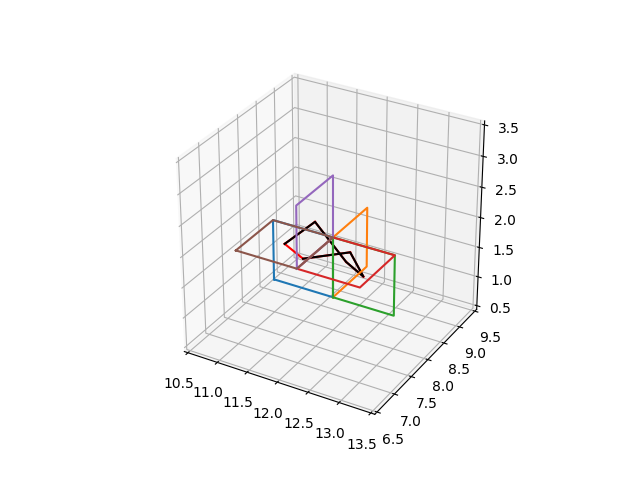

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
X,Y,Z = [],[],[]
cycle = [2497, 322, 2531, 4765, 319, 4728]

subgraph = C.graph_res_networkx.subgraph(cycle).copy()

for edge in subgraph.edges:
    A,B = edge
    A = transform_res_to_point(C.mapping[A])
    B = transform_res_to_point(C.mapping[B])
    X.append(A[0])
    X.append(B[0])
    Y.append(A[1])
    Y.append(B[1])
    Z.append(A[2])
    Z.append(B[2])
    ax.plot([A[0],B[0]],[A[1],B[1]],[A[2],B[2]],color="red")

for D in [cycle]:
    X1,Y1,Z1 = [],[],[]
    for point in D:
        point = transform_res_to_point(C.mapping[point])
        X1.append(point[0])
        Y1.append(point[1])
        Z1.append(point[2])
    ax.plot(X1,Y1,Z1,color="black")
    X = X+X1
    Y = Y+Y1
    Z = Z+Z1

# for edge in [a,b]:
#     p1,p2 = edge
#     p1 = transform_res_to_point(C.mapping[p1])
#     p2 = transform_res_to_point(C.mapping[p2])
#     ax.plot([p1[0],p2[0]],[p1[1],p2[1]],[p1[2],p2[2]],color="blue")

ref_ = Refine_cycle([C.mapping[point] for point in cycle]+ [C.mapping[cycle[0]]])

# for point in Badpoints:
#     point = transform_res_to_point(C.mapping[point])
#     ax.plot(point[0],point[1],point[2],color="red",marker="x")

for square in ref_.squares:
    A,B,M = [],[],[]
    mean_point = np.mean(np.array(square)[:4],axis=0)
    mean_point = tuple(mean_point)
    if True:
        for point in square+[square[0]]:
            A.append(point[0])
            B.append(point[1])
            M.append(point[2])
        ax.plot(A,B,M)

# X = X+A
# Y = Y+B
# Z = Z+M

# for point in degree_2:
#     point = transform_res_to_point(C.mapping[point])
#     ax.plot(point[0],point[1],point[2],color="red",marker="x")

X,Y,Z = np.array(X),np.array(Y),np.array(Z)
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 + 1

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)



In [34]:
len(C.cycles)

7

In [2]:
C.graph_res_networkx.neighbors(a[0])

NameError: name 'C' is not defined